# Introdução ao Projeto 2 - Ciência dos dados 2021.2

O projeto propõe a crição de um classificador - modelo de classificalçao ou de regressão - capaz de prever uma variável target ou uma variável contínua. 

O primeiro passo do projeto foi encontrar uma base de dados adequada. O site Taggle, que contém informações sobre a potabilidade da água com base em suas propriedades e elementos nela contidos.
Assim, a variável target é Potability,  e as variáveis feature são todas as outras colunas presentes na base de dados, como pH, Hardness e Turbudity. 

Como a utilização de uma base de dados cuja variável target é qualitativa, e não quantitativa, a decisão tomada foi de fazer modelos de classificação, visto que são mais adequados pra esse tipo de variável.

In [60]:
from scipy.stats import norm, expon, poisson as pois, binom, uniform as uni
import pandas as pd
import sklearn
from sklearn.model_selection import train_test_split as tts
from sklearn.ensemble import RandomForestClassifier as RandomForestC, GradientBoostingClassifier as GradientBoostingC
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix as cm, classification_report, precision_score, plot_roc_curve, plot_precision_recall_curve, balanced_accuracy_score, roc_auc_score, accuracy_score, recall_score
import statsmodels.api as sm
from statsmodels.api import Logit
from tqdm.notebook import tqdm
import numpy as np
import tensorflow as tf
from tensorflow import keras
from keras.layers import Dense
from keras.models import Sequential
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display, HTML

In [61]:
css = '<style>.output {flex-direction: row;}</style>'
HTML(css)
pd.set_option('display.min_rows', 99999)

In [62]:
# Base de dados
df_agua = pd.read_csv('DataBase/water_potability.csv')
df_agua

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0
5,5.584087,188.313324,28748.687739,7.544869,326.678363,280.467916,8.399735,54.917862,2.559708,0
6,10.223862,248.071735,28749.716544,7.513408,393.663396,283.651634,13.789695,84.603556,2.672989,0
7,8.635849,203.361523,13672.091764,4.563009,303.309771,474.607645,12.363817,62.798309,4.401425,0
8,NaN,118.988579,14285.583854,7.804174,268.646941,389.375566,12.706049,53.928846,3.595017,0
9,11.180284,227.231469,25484.508491,9.077200,404.041635,563.885481,17.927806,71.976601,4.370562,0


# Apresentação da análise
O objetivo da análise é entender a distribuição e relação das propriedades da água, e descobrir se eles se relacionam de alguma maneira e, caso positivo, como essa interação acontece. Principalmente, a meta a ser alcançada é definir com uma determinada precisão se a água estudada é própria para consumo ou não, de acordo com sua potabilidade.



# Vendo a correlação antes de alterar algo

In [63]:
# Correlação 
corr_bruto = pd.DataFrame.from_dict({k: {i: df_agua[k].corr(df_agua[i]) for i in list(df_agua)} for k in list(df_agua)})
corr_bruto

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
ph,1.000000,0.082096,-0.089288,-0.034350,0.018203,0.018614,0.043503,0.003354,-0.039057,-0.003556
Hardness,0.082096,1.000000,-0.046899,-0.030054,-0.106923,-0.023915,0.003610,-0.013013,-0.014449,-0.013837
Solids,-0.089288,-0.046899,1.000000,-0.070148,-0.171804,0.013831,0.010242,-0.009143,0.019546,0.033743
Chloramines,-0.034350,-0.030054,-0.070148,1.000000,0.027244,-0.020486,-0.012653,0.017084,0.002363,0.023779
Sulfate,0.018203,-0.106923,-0.171804,0.027244,1.000000,-0.016121,0.030831,-0.030274,-0.011187,-0.023577
Conductivity,0.018614,-0.023915,0.013831,-0.020486,-0.016121,1.000000,0.020966,0.001285,0.005798,-0.008128
Organic_carbon,0.043503,0.003610,0.010242,-0.012653,0.030831,0.020966,1.000000,-0.013274,-0.027308,-0.030001
Trihalomethanes,0.003354,-0.013013,-0.009143,0.017084,-0.030274,0.001285,-0.013274,1.000000,-0.022145,0.007130
Turbidity,-0.039057,-0.014449,0.019546,0.002363,-0.011187,0.005798,-0.027308,-0.022145,1.000000,0.001581
Potability,-0.003556,-0.013837,0.033743,0.023779,-0.023577,-0.008128,-0.030001,0.007130,0.001581,1.000000


# Verificando se faltam dados

In [64]:
df_agua.isnull().sum()

ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64

# Como tem quase 1000 dados de sulfato faltando, é interessante analisar um pouco mais...


In [65]:
# Comparação da correlação da quantidade de sulfato com uma análise binária de valores nulos
pd.DataFrame.from_dict({'Sulfato_na': {i: df_agua['Sulfate'].isna().corr(df_agua[i]) for i in list(df_agua)}, 'Sulfato': {i: df_agua['Sulfate'].corr(df_agua[i]) for i in list(df_agua)}})

,Sulfato_na,Sulfato
ph,-0.003380,0.018203
Hardness,0.008482,-0.106923
Solids,-0.010554,-0.171804
Chloramines,0.003452,0.027244
Sulfate,NaN,1.000000
Conductivity,0.014941,-0.016121
Organic_carbon,-0.023424,0.030831
Trihalomethanes,0.011342,-0.030274
Turbidity,-0.002739,-0.011187
Potability,-0.017148,-0.023577


In [66]:
# Em qual intervalo de quantidade de sulfato tem mais água potável? 
df_agua.groupby(pd.cut(df_agua["Sulfate"], [100, 200, 300, 400, 500])).sum()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
Sulfate,,,,,,,,,,
"(100, 200]",41.217291,1390.849069,2.136597e+05,62.334002,1058.232554,2714.941131,65.089762,433.041204,24.160863,6
"(200, 300]",2738.399672,93140.327891,1.150551e+07,3261.478099,129514.667820,199508.669879,6528.501431,30580.952958,1857.332158,231
"(300, 400]",11422.639189,370294.373365,4.044337e+07,13434.888267,644151.555619,801702.845009,27148.638982,117636.689146,7457.102608,675
"(400, 500]",787.115474,24727.104161,2.891779e+06,1003.752214,58046.106651,57769.857092,2006.923301,8664.492215,561.519393,73


In [67]:
# Filtrando o que é potável 
Sulf_NaN = df_agua.loc[df_agua['Sulfate'].isna()]; Sulf_NaN_Pot = Sulf_NaN['Potability'].sum()
print(f' {Sulf_NaN_Pot * 100 / Sulf_NaN.Sulfate.size}% de NaN (Sulfato) são potáveis')
print(f' {Sulf_NaN.Sulfate.size * 100 / df_agua.Sulfate.size}% das linhas não tem dados para Sulfato')

 37.516005121638926% de NaN (Sulfato) são potáveis
 23.84004884004884% das linhas não tem dados para Sulfato


In [68]:
# Médias de sulfeto nas águas potáveis e não potáveis - todas as amostras
sulfato0 = df_agua.loc[df_agua['Potability']==0]; sulfato1 = df_agua.loc[df_agua['Potability']==1]
print(f"Média de sulfato em águas nao potáveis {sulfato0['Sulfate'].sum() / sulfato0['Sulfate'].size} e em águas potáveis {sulfato1['Sulfate'].sum() / sulfato1['Sulfate'].size}, considerando todas as amostras")


Média de sulfato em águas nao potáveis 252.84888751942893 e em águas potáveis 256.3211935682007, considerando todas as amostras


In [69]:
#  Médias de sulfeto nas águas potáveis e não potáveis - apenas amostras com dados para sulfato
sulfato_semNaN = df_agua[['Sulfate', 'Potability']].dropna()
sulfato0_semNaN = sulfato_semNaN.loc[sulfato_semNaN['Potability']==0]; sulfato1_semNaN = sulfato_semNaN.loc[sulfato_semNaN['Potability']==1]

print(f"Média de sulfato em águas não potáveis {sulfato0_semNaN['Sulfate'].sum() / sulfato0_semNaN['Sulfate'].size} e em águas potáveis {sulfato1_semNaN['Sulfate'].sum() / sulfato1_semNaN['Sulfate'].size}, considerando somente as amostras com dados para sulfato")

Média de sulfato em águas não potáveis 334.5642895786881 e em águas potáveis 332.5669902336656, considerando somente as amostras com dados para sulfato


# Considerações finais sobre a análise inicial

Na primeira parte da análise de dados, é possível entender a correlação entre as propriedades da água, e como alguns dados são mais independentes do que outros.

Depois, foi realizada a busca por possíveis faltas de dados, que se demonstrou eficaz em evindenciar que muita informação sobre pH, Sulfate e Trihalomethanes não estão presentes no banco de dados. Como, especialmente, o Sulfate apresentou a maior lacuna de dados entre as colunas, entendeu-se como necessário fazer uma análise mais profunda. A partir dessa análise extra, determinou-se que as lacunas serão preenchidas com a média dos dados. Para a água não potável, será a média de sulfato na água não potável, sendo essa relação válida para a água potável.

Com base nos dados gerados nesse primeiro estudo, Foi notado que as médias de Sulfato em águas potáveis e em águas não potáveis, considerando todas as amostras, eram muito parecidas. Também, as amostras considerando apenas os rescpectivos dados de sua potabilidade também são próximas. Com base nisso, conclui-se que substituir os dados inexistentes pela média de sua classificação é de suma importância. O mesmo procedimento foi realizado para as outras colunas com lacuna de dados. No entando, neste momento, foi decidido que realizar essa substituiçãourua afetar os outliers, visto que aumenta a concentração de dados em torno de um número. Os outliers, que também podem ser definidos por uma série de outros nomes - como dados discrepantes, pontos fora da curva, observações fora do comum, anomalias, valores atípicos, entre outros - são úteis para analisar se existem muitos dados que estão fora do padrão. Em um contexto de machine learning, não se pode dizer que outliers sempre atrapalham ou sempre ajudam o modelo a melhorar sua performance, mas a decisão de remover ou manter os outlier sempre tem um impacto e, para que esse impacto seja condizente com o os dados coletados, é nessessário calcular esse antes de concretizar qualquer alteração na base de dados.

Uma das melhores e mais utilizadas formas de encontrar os outliers é através de gráficos chamados de BoxPlot. Isso acontece porque, ao plotar este tipo de gráfico, ele deixa claro a região em que se espera encontrar a maioria dos dados ao tomar uso dos quartis para definir os limites inferior e superior de que se considera rozoável.

# Olhando Outliers

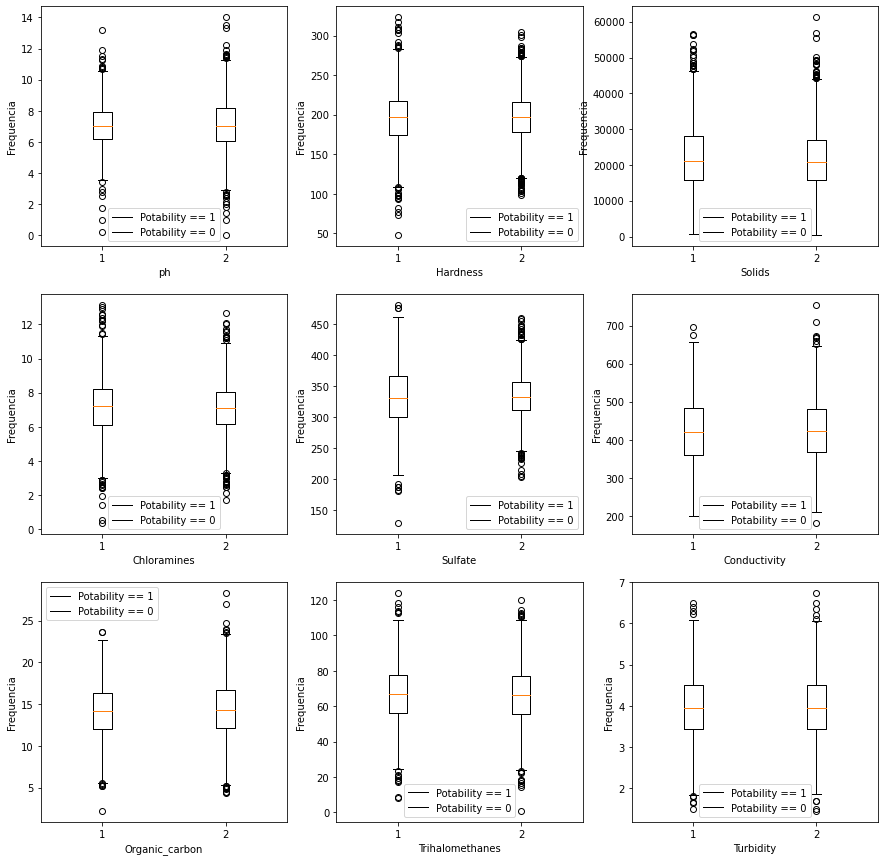

In [70]:
# Vizualizando
plt.figure(figsize=(15, 15), num='corr_ajustada sem pot')
n = 1
for i in ['ph','Hardness','Solids','Chloramines','Sulfate','Conductivity','Organic_carbon','Trihalomethanes','Turbidity']:
    plt.subplot(3, 3, n)
    n+=1
    plt.boxplot([df_agua.loc[df_agua['Potability']==1][i].dropna(), df_agua.loc[df_agua['Potability']==0][i].dropna()])
    plt.xlabel(i)
    plt.ylabel('Frequencia')
    plt.legend(('Potability == 1', 'Potability == 0'))
plt.show()

In [71]:
# Divindo os quantis
Q1 = df_agua.quantile(0.25)
Q3 = df_agua.quantile(0.75)
IQR = Q3 - Q1
Outliers = ((df_agua < (Q1 - 1.5 * IQR)) | (df_agua > (Q3 + 1.5 * IQR))).sum()
Outliers.sum()

366

# Com Outliers

In [72]:
# Utilizando as médias das colunas para preencher as informações faltando
df_agua1 = df_agua.copy()
df_agua1_1 = df_agua1.loc[df_agua1['Potability'] == 1]
df_agua1_0 = df_agua1.loc[df_agua1['Potability'] == 0]
for i in list(df_agua):
    df_agua1.loc[df_agua1[i] == 1] = df_agua1.loc[df_agua1[i] == 1].fillna(df_agua1.loc[df_agua1[i] == 1].mean())
    df_agua1.loc[df_agua1[i] == 0] = df_agua1.loc[df_agua1[i] == 0].fillna(df_agua1.loc[df_agua1[i] == 0].mean())
df_agua1

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,7.085378,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,334.564290,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,334.564290,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0
5,5.584087,188.313324,28748.687739,7.544869,326.678363,280.467916,8.399735,54.917862,2.559708,0
6,10.223862,248.071735,28749.716544,7.513408,393.663396,283.651634,13.789695,84.603556,2.672989,0
7,8.635849,203.361523,13672.091764,4.563009,303.309771,474.607645,12.363817,62.798309,4.401425,0
8,7.085378,118.988579,14285.583854,7.804174,268.646941,389.375566,12.706049,53.928846,3.595017,0
9,11.180284,227.231469,25484.508491,9.077200,404.041635,563.885481,17.927806,71.976601,4.370562,0


# Sem Outliers

In [73]:
# Filtra os Outliers
df_agua1_Sout = df_agua1.copy()
for i in list(df_agua.columns)[:-1]:
    df_agua1_Sout = df_agua1_Sout[(df_agua1_Sout[i] >= (Q1[i] - 1.5 * IQR[i])) & (df_agua1_Sout[i] <= (Q3[i] + 1.5 * IQR[i]))]
df_agua1_Sout

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,7.085378,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,334.564290,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,334.564290,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0
5,5.584087,188.313324,28748.687739,7.544869,326.678363,280.467916,8.399735,54.917862,2.559708,0
6,10.223862,248.071735,28749.716544,7.513408,393.663396,283.651634,13.789695,84.603556,2.672989,0
7,8.635849,203.361523,13672.091764,4.563009,303.309771,474.607645,12.363817,62.798309,4.401425,0
8,7.085378,118.988579,14285.583854,7.804174,268.646941,389.375566,12.706049,53.928846,3.595017,0
10,7.360640,165.520797,32452.614409,7.550701,326.624353,425.383419,15.586810,78.740016,3.662292,0


In [74]:
# Verificando se faltam dados
df_agua1.isnull().sum()

ph                 0
Hardness           0
Solids             0
Chloramines        0
Sulfate            0
Conductivity       0
Organic_carbon     0
Trihalomethanes    0
Turbidity          0
Potability         0
dtype: int64

In [75]:
# Ajustando a correlação
corr_ajustada = pd.DataFrame.from_dict({k: {i: df_agua1[k].corr(df_agua1[i]) for i in list(df_agua1)} for k in list(df_agua1)})
corr_ajustada

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
ph,1.000000,0.075878,-0.081887,-0.031827,0.014785,0.017205,0.040092,0.003009,-0.036211,-0.003848
Hardness,0.075878,1.000000,-0.046899,-0.030054,-0.092718,-0.023915,0.003610,-0.012718,-0.014449,-0.013837
Solids,-0.081887,-0.046899,1.000000,-0.070148,-0.149809,0.013831,0.010242,-0.008849,0.019546,0.033743
Chloramines,-0.031827,-0.030054,-0.070148,1.000000,0.023490,-0.020486,-0.012653,0.016615,0.002363,0.023779
Sulfate,0.014785,-0.092718,-0.149809,0.023490,1.000000,-0.014196,0.027403,-0.025797,-0.009523,-0.026957
Conductivity,0.017205,-0.023915,0.013831,-0.020486,-0.014196,1.000000,0.020966,0.001238,0.005798,-0.008128
Organic_carbon,0.040092,0.003610,0.010242,-0.012653,0.027403,0.020966,1.000000,-0.012944,-0.027308,-0.030001
Trihalomethanes,0.003009,-0.012718,-0.008849,0.016615,-0.025797,0.001238,-0.012944,1.000000,-0.021540,0.007305
Turbidity,-0.036211,-0.014449,0.019546,0.002363,-0.009523,0.005798,-0.027308,-0.021540,1.000000,0.001581
Potability,-0.003848,-0.013837,0.033743,0.023779,-0.026957,-0.008128,-0.030001,0.007305,0.001581,1.000000


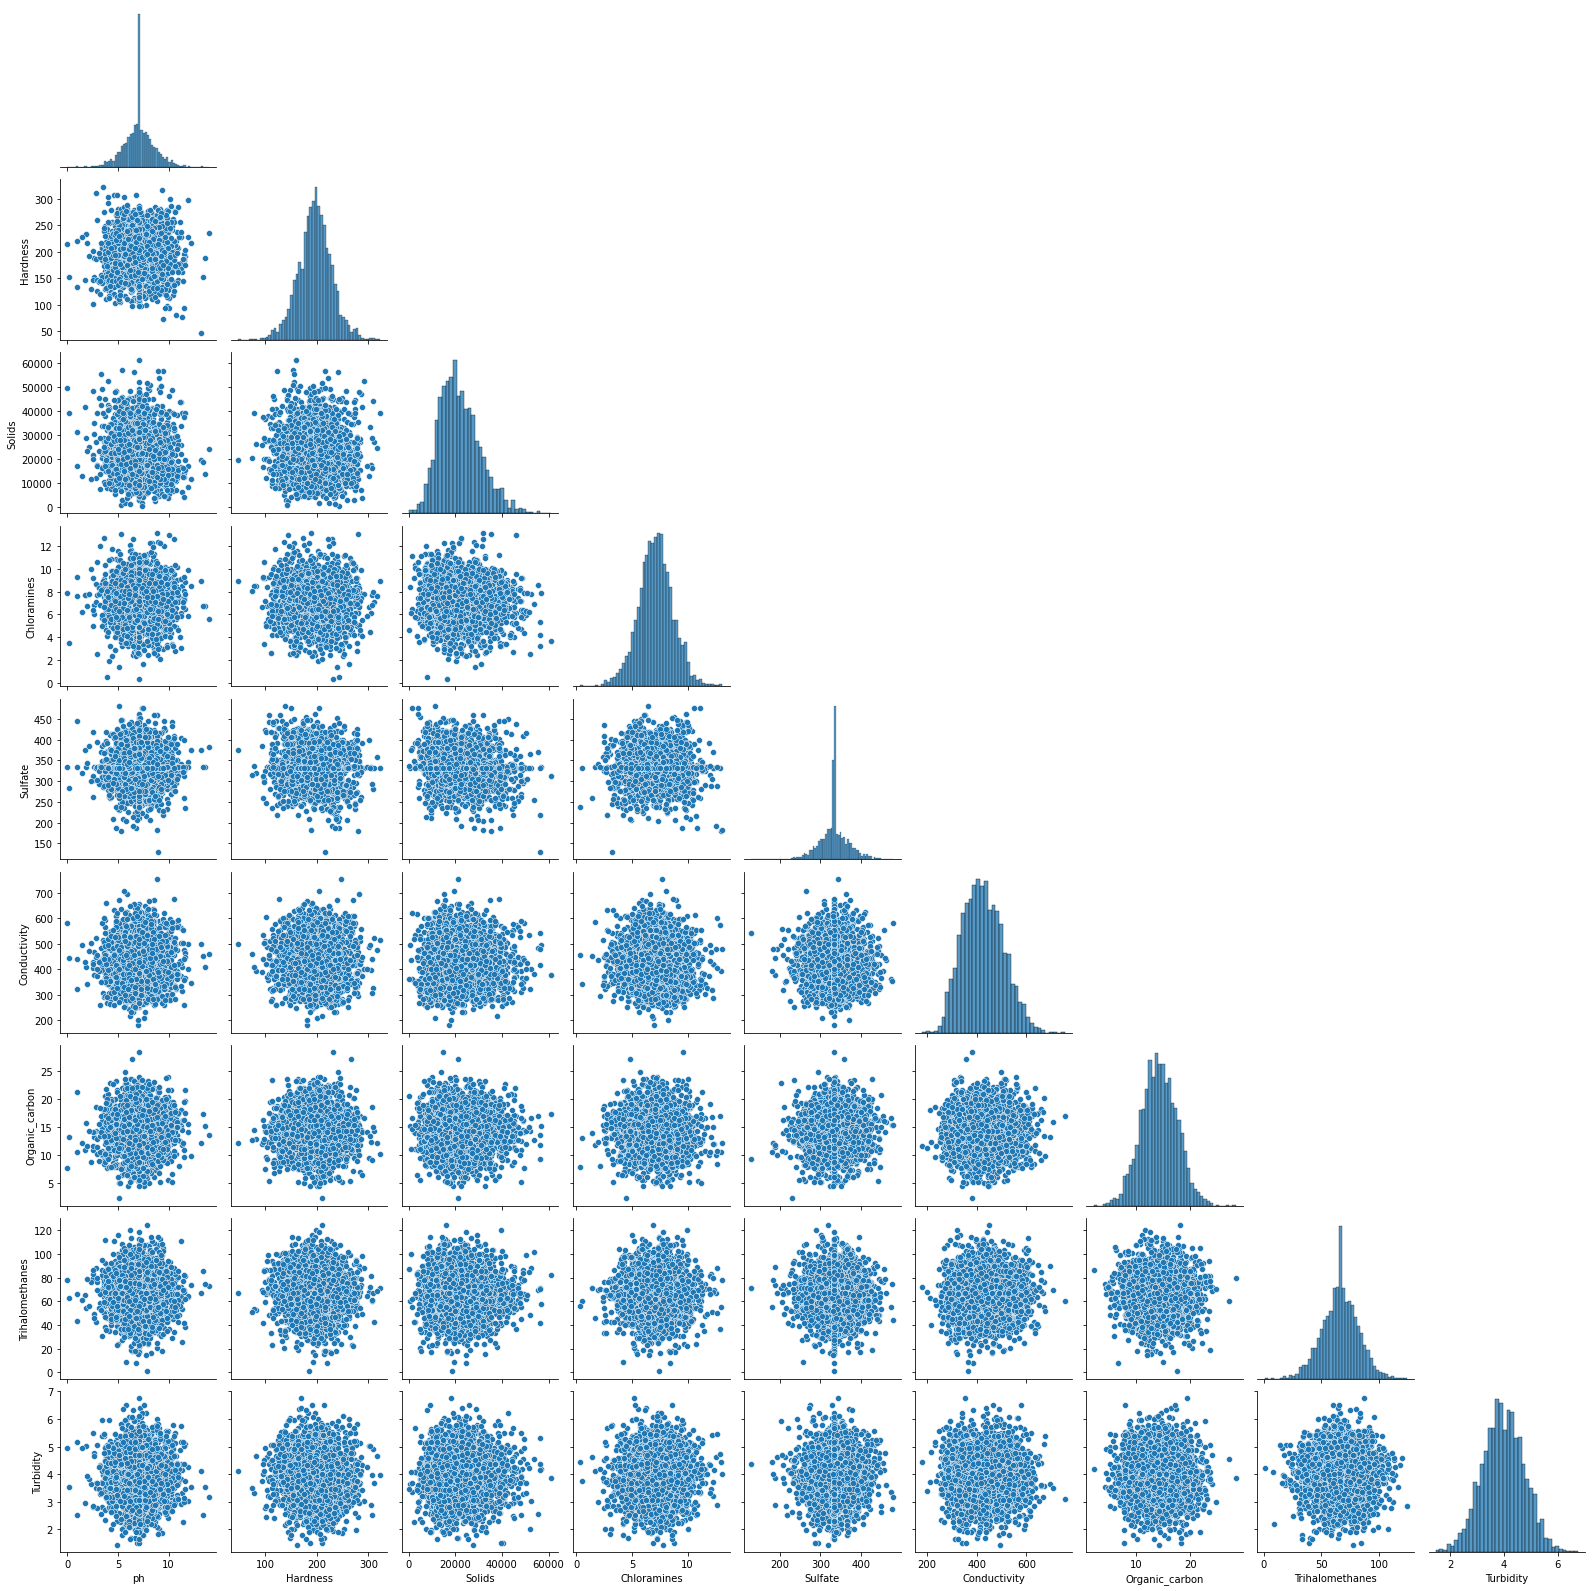

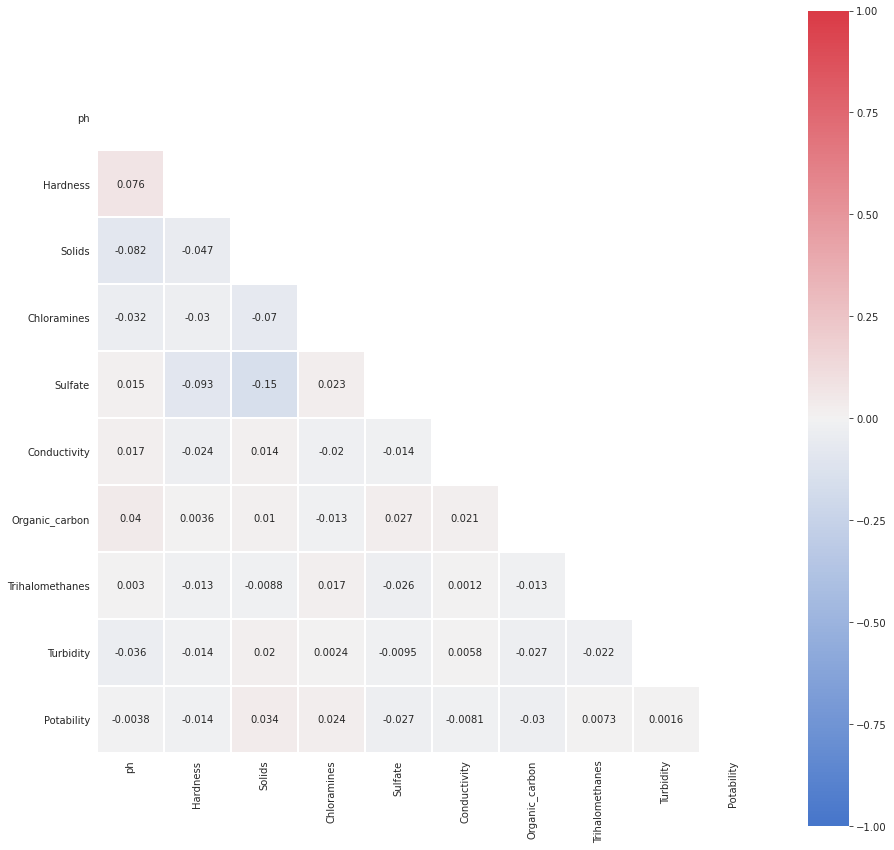

In [76]:
# Vizualizando a dispersão dos valores (correlacionando eles)
sns.pairplot(df_agua1[['ph','Hardness','Solids','Chloramines','Sulfate','Conductivity','Organic_carbon','Trihalomethanes','Turbidity']], corner=True)
plt.show(block=False)
mask = np.zeros_like(corr_ajustada)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(15, 15), num='corr_ajustada sem pot')
    cmap = sns.diverging_palette(255, 10, as_cmap=True)
    sns.heatmap(corr_ajustada, vmin=-1, vmax=1, mask=mask, cmap=cmap, annot=True, square=True, linewidths=1)
plt.show(block=False)

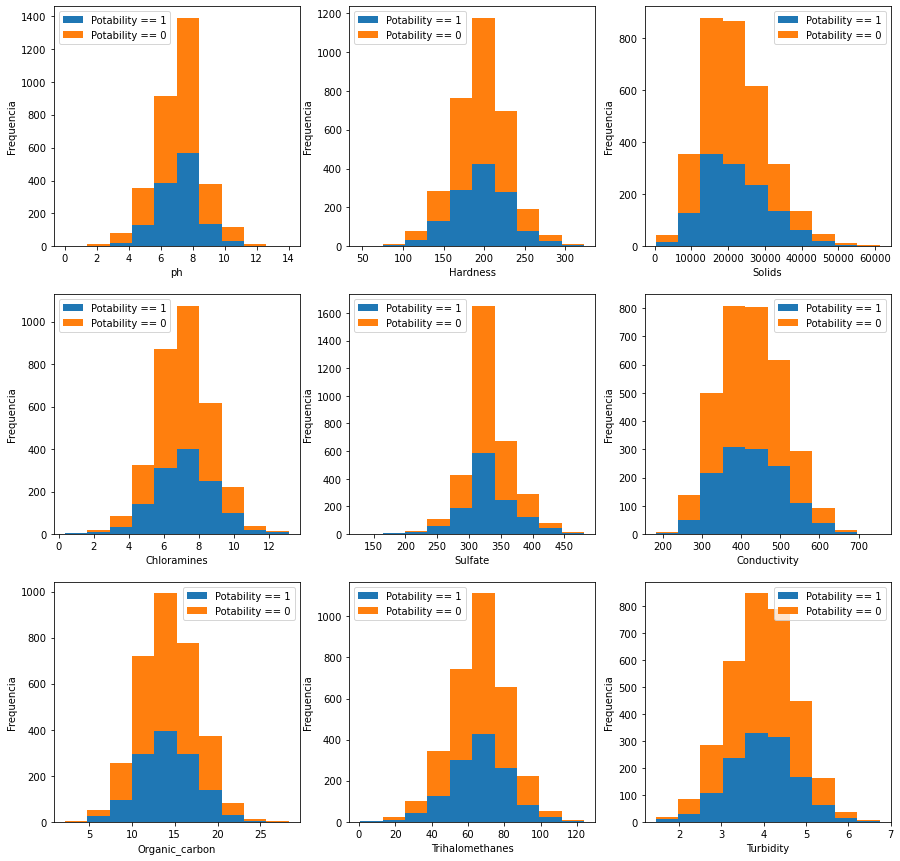

In [77]:
# Vizualizando ocorrência de potabilidade por faixa de valor de cada propriedade
plt.figure(figsize=(15, 15), num='corr_ajustada sem pot')
n = 1
for i in ['ph','Hardness','Solids','Chloramines','Sulfate','Conductivity','Organic_carbon','Trihalomethanes','Turbidity']:
    plt.subplot(3, 3, n)
    n+=1
    plt.hist([df_agua1.loc[df_agua1['Potability']==1][i], df_agua1.loc[df_agua1['Potability']==0][i]], stacked=True)
    plt.xlabel(i)
    plt.ylabel('Frequencia')
    plt.legend(('Potability == 1', 'Potability == 0'))
plt.show()

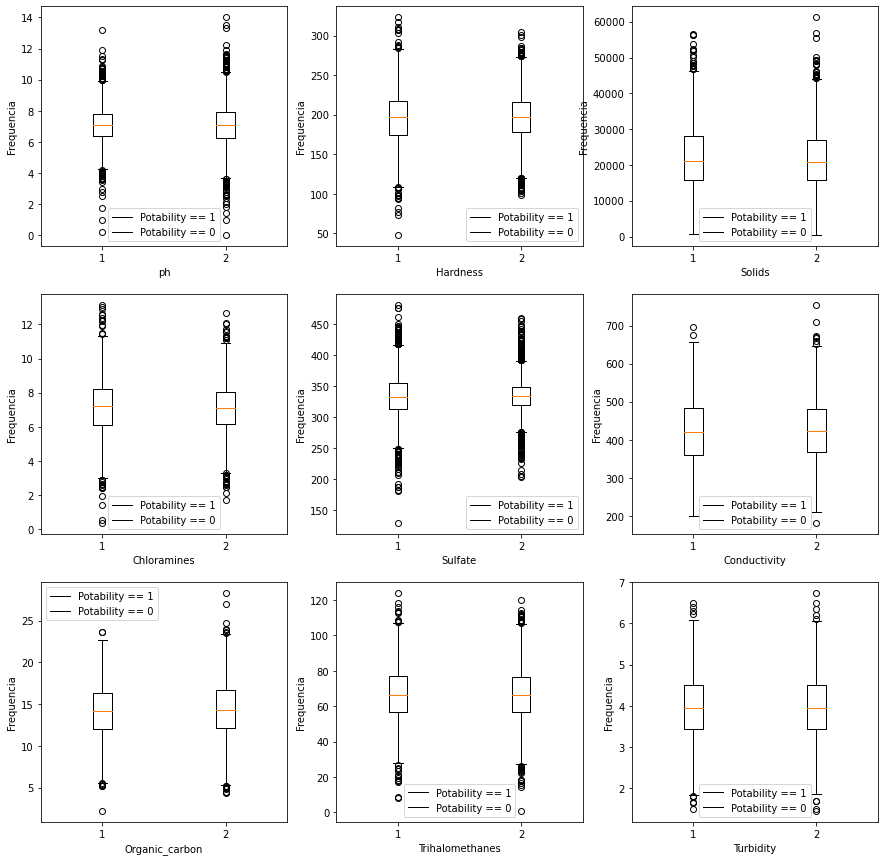

In [78]:
# Dispersão de valores com base na média
plt.figure(figsize=(15, 15), num='corr_ajustada sem pot')
n = 1
for i in ['ph','Hardness','Solids','Chloramines','Sulfate','Conductivity','Organic_carbon','Trihalomethanes','Turbidity']:
    plt.subplot(3, 3, n)
    n+=1
    plt.boxplot([df_agua1.loc[df_agua1['Potability']==1][i], df_agua1.loc[df_agua1['Potability']==0][i]])
    plt.xlabel(i)
    plt.ylabel('Frequencia')
    plt.legend(('Potability == 1', 'Potability == 0'))
plt.show()

In [79]:
# Detalhes das medidas de descrição - potável
df_agua1.loc[df_agua1['Potability'] == 1].describe()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
count,1278.000000,1278.000000,1278.000000,1278.000000,1278.000000,1278.000000,1278.000000,1278.000000,1278.000000,1278.0
mean,7.073783,195.800744,22383.991018,7.169338,332.566990,425.383800,14.160893,66.539684,3.968328,1.0
std,1.343952,35.547041,9101.010208,1.702988,41.865385,82.048446,3.263907,15.971941,0.780842,0.0
min,0.227499,47.432000,728.750830,0.352000,129.000000,201.619737,2.200000,8.175876,1.492207,1.0
25%,6.351824,174.330531,15668.985035,6.094134,313.052947,360.939023,12.033897,56.911186,3.430909,1.0
50%,7.073783,196.632907,21199.386614,7.215163,332.566990,420.712729,14.162809,66.539684,3.958576,1.0
75%,7.780068,218.003420,27973.236446,8.199261,354.807924,484.155911,16.356245,77.067457,4.509569,1.0
max,13.175402,323.124000,56488.672413,13.127000,481.030642,695.369528,23.604298,124.000000,6.494249,1.0


In [80]:
# Detalhes das medidas de descrição - não potável
df_agua1.loc[df_agua1['Potability'] == 0].describe()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
count,1998.000000,1998.000000,1998.000000,1998.000000,1998.000000,1998.000000,1998.000000,1998.000000,1998.000000,1998.0
mean,7.085378,196.733292,21777.490788,7.092175,334.564290,426.730454,14.364335,66.303555,3.965800,0.0
std,1.545489,31.057540,8543.068788,1.501045,31.941870,80.047317,3.334554,15.642622,0.780282,0.0
min,0.000000,98.452931,320.942611,1.683993,203.444521,181.483754,4.371899,0.738000,1.450000,0.0
25%,6.224046,177.823265,15663.057382,6.155640,319.354715,368.498530,12.101057,56.441831,3.444062,0.0
50%,7.085378,197.123423,20809.618280,7.090334,334.564290,422.229331,14.293508,66.303555,3.948076,0.0
75%,7.940697,216.120687,27006.249009,8.066462,348.316746,480.677198,16.649485,76.518849,4.496106,0.0
max,14.000000,304.235912,61227.196008,12.653362,460.107069,753.342620,28.300000,120.030077,6.739000,0.0


# Considerações finais sobre a análise *como um todo*


Tendo em vista a segunda parte da análise, assim como a própria análise como um todo é possível notar como alterar dados na base antes de decidir se tratar os outliers os afeta. Ao comparar os dois BoxPlots gerados, é possível notar o fenômeno explicado acima sobre o aumento na quantidade de outliers evidenciados pelo gráfico ao fazer alterações na base de dados. Vale notar também que, apesar de ter criado um novo dataframe sem os outliers no início da segunda parte da análise, toda a análise foi feita utilizando os dados com outliers. Também, ao analisar o pairplot e o heatmap plotados, juntamente com o dataframe de correlação ajustado, é possível perceber que fazer esse tipo de alteração na base de dados não afeta significativamente a correlação, ao contrário do que acontece com os outliers. Por fim, ao analisar os histogramas gerados, é notável que os dados de agua potável e não potável seguem o mesmo comportamento Isso sustenta a conclusão de que, na maioria das ocasiões, as análises feitas para uma classificação também vai ser verdadeira para a outra.


#  Iniciando modelos de classificação

# O que é um modelo de classificação?

O método de análise permite estimar o valor de uma determinada variável resposta (variável dependente) como função de outras variáveis preditoras (variáveis independentes).  Nele, a estimação dos mínimos quadrados ordinários – MQO é uma técnica de otimização dos quadrados do erro da regressão. 
 
Apesar de esse método de análise ser muito eficaz, é preciso haver cuidado, visto que os resultados tendem a ser enviesados. Isso acontece porque o método é ancorado em alguns pressupostos que precisam ser respeitados. No caso, os testes são todos baseados no pressuposto da normalidade. Sendo assim, se a análise de  uma variável que não possui distribuição normal com esse método, os resultados não serão satisfatórios. 

Também, é importante comentar sobre o classificador probabilístico “Naive Bayes”, um dos mais utilizados para categorizar textos com base na frequência das palavras usadas. O método pode ser usado quando os atributos que descrevem as instâncias forem condicionalmente independentes, ou seja, quando se trata sobre probabilidade condicional. O classificador se faz excelente na resolução de problemas relacionado a textos, realizando a filtragem. Além disso, o algoritmo é muito robusto nas previsões em tempo real, ainda mais por precisar de poucos dados para a realização. Contudo, caso tenha a necessidade de correlacionar fatores, classificador tende a ter falhas na predição. 

### Exibir Dados

In [81]:
def metricas(tt_spit, lista_dados):
    arrays = [['Cout','Cout','Cout','Cout','Cout','Cout','Cout','Cout','Sout','Sout','Sout','Sout','Sout','Sout','Sout','Sout'],['Vp','Vn','Fp','Fn','acuracia_treino','acuracia_teste','precision_treino','precision_teste','Vp','Vn','Fp','Fn','acuracia_treino','acuracia_teste','precision_treino','precision_teste']]
    tuples = list(zip(*arrays))
    dic_ite = [[] for i in range(len(tt_spit[0]))]
    index = ['iteracao' + str(i+1) for i in range(len(tt_spit[0]))]
    columns = pd.MultiIndex.from_tuples(tuples)
    for j in range(len(tt_spit)):
        print('Cout' if j == 0 else 'Sout')
        plt.figure(figsize=(20, 20), num=''.join('Cout' if j == 0 else 'Sout'))
        n=1
        acuracia_treino = [i[0][0] for i in lista_dados[j]]
        acuracia_teste = [i[0][1] for i in lista_dados[j]]
        predicao = [i[0][2] for i in lista_dados[j]]
        precision_treino = [i[1][0] for i in lista_dados[j]]
        precision_teste = [i[1][1] for i in lista_dados[j]]
        for i in range(len(tt_spit[j])):
            Train_X = tt_spit[j][i][0]; Test_X = tt_spit[j][i][1]; Train_Y = tt_spit[j][i][2]; Test_Y = tt_spit[j][i][3]
            Vn, Fp, Fn, Vp = cm(Test_Y, predicao[i]).ravel()
            dic_ite[i].append(Vp)
            dic_ite[i].append(Vn)
            dic_ite[i].append(Fp)
            dic_ite[i].append(Fn)
            dic_ite[i].append(acuracia_treino[i])
            dic_ite[i].append(acuracia_teste[i])
            dic_ite[i].append(precision_treino[i])
            dic_ite[i].append(precision_teste[i])
            plt.subplot(3, 4, n)
            mc = cm(Test_Y, predicao[i])
            cmap = sns.diverging_palette(255, 10, as_cmap=True)
            sns.heatmap(mc, cmap=cmap, annot=True, square=True, linewidths=1)
            plt.title(f'iteracao {n}\nacuracia {acuracia_teste[i]}')
            plt.xlabel('Classificação do Classificador')
            plt.ylabel('Classificação real')
            n+=1
        plt.subplot(3, 4, 12)
        plt.hist([round(i) for i in acuracia_teste])
        plt.xlabel('Acuracia')
        plt.ylabel('Frequencia')
        plt.show()
    df = pd.DataFrame(dic_ite, index=index, columns=columns)
    df[('Cout-Sout','acuracia_treino')] = df[('Cout','acuracia_treino')] - df[('Sout','acuracia_treino')]
    df[('Cout-Sout','acuracia_teste')] = df[('Cout','acuracia_teste')] - df[('Sout','acuracia_teste')]
    df[('Cout-Sout','precision_treino')] = df[('Cout','precision_treino')] - df[('Sout','precision_treino')]
    df[('Cout-Sout','precision_teste')] = df[('Cout','precision_teste')] - df[('Sout','precision_teste')]
    return df

## Random Forest Classifier. 

Começando pelo nome, o classificador Random Forest já contém a palavra "aleatório", que denota o comportamento do algortimo ao selecionar subconjuntos de features e montar árvores de decisão. Já com o segundo nome, Forest, significa floresta, representando a grande quantidade de árvores de decisão geradas. Para funcionar, o algoritmo realiza uma seleção aleatória de algumas fontes, da feature mais adequada para a posição do nó raiz, gera os nós filhos e acaba repetindo esse processo até atingir a quantidade de arvores desejada no projeto. Após a geração do modelo, as previsões são feitas tendo a partir de uma espécie de votação. Cada árvore realiza uma decisão a partir dos dados apresentados. Desse modo, a decisão que possuir mais votos é a resposta do algortimo. O Random Forest é, relativamente, de fácil entendimento de seu funcionamento, bastante útil para resolver problemas de regressão e classificação, apresentando resultados satisfatórios em situações variadas, com um bom desenpenho, e possui implementações em várias bibliotecas de IA disponível atualmente.


In [82]:
def RF_Clf(Train_X, Test_X, Train_Y, Test_Y):
    RF_clf = RandomForestC()
    RF_clf.fit(Train_X, Train_Y)
    RF_train_score = RF_clf.score(Train_X, Train_Y)*100
    RF_test_score = RF_clf.score(Test_X, Test_Y)*100
    RF_train_pred = RF_clf.predict(Train_X)
    RF_test_pred = RF_clf.predict(Test_X)
    RF_train_Recalscore = precision_score(Train_Y, RF_train_pred)*100
    RF_test_Recalscore = precision_score(Test_Y, RF_test_pred)*100
    return [[RF_train_score, RF_test_score, RF_test_pred], [RF_train_Recalscore, RF_test_Recalscore]]

## XGBoost Classifier. 

O XGBoost é um algoritmo de aprendizado de máquina, tambem baseado em árvores de decisão e que faz uso de uma estrutura de Gradiente boosting. Esse algoritmo é satisfatório pois pode ser usado em uma variedade de situações, , como regressão, classificação, ranqueamento, entre outros, além de ser compatível nos 3 sistemas operacionais mais comuns - Windows, Linux e OS X. Outra vantagem é que ele suporta as prinipais linguagens de programação - no caso desse projeto: Python. Seu algoritmo de gradiente descendente é capaz de minimizar erros, combinando técnicas de otimização de software e hardware para otimizar os recursos computacionais em menos tempo.


In [83]:
def XGB_Clf(Train_X, Test_X, Train_Y, Test_Y):
    XGB_clf = GradientBoostingC()
    XGB_clf.fit(Train_X, Train_Y)
    XGB_train_score = XGB_clf.score(Train_X, Train_Y)*100
    XGB_test_score = XGB_clf.score(Test_X, Test_Y)*100
    XGB_train_pred = XGB_clf.predict(Train_X)
    XGB_test_pred = XGB_clf.predict(Test_X)
    XGB_train_precision_score = precision_score(Train_Y, XGB_train_pred)*100
    XGB_test_precision_score = precision_score(Test_Y, XGB_test_pred)*100
    return [[XGB_train_score, XGB_test_score, XGB_test_pred], [XGB_train_precision_score, XGB_test_precision_score]]

## Logistic Regression.
*Explicação de como funciona a regressão geral. Depois, sobre a linear em específico*

A regressão logística é um algoritmo utilizado para classificação. O nome regressão está ligado ao fato da Regressão Logística ter uma construção a partir de uma aplicação de uma transformação, que é denominada função logística ou sgmoide sobre a regressão linear.

Quando lidamos com um problema de regressão, a variável alvo (resultado da predição) pode cair dentro do intervalo dos números reais. Já o objetivo da regressão linear é encontrar a equação da reta que melhor se ajusta ao conjunto de dados **, com caso,** encontrar a combinação dos coeficientes linear e angulares, que assim diminuirá os erros de predição. Contudo, não faz sentido aplicar a técnica de regressão linear para prever rótulos e não valores quantitativos. Mas as vantagens de trabalhar com o modelo de regressão logística é que ele não atua somente como um classificador, podendo também fornecer valores de probabilidade para cada instância classificada. O modelo também é relativamente fácil de implementar, interpretar, é rápido e possui um bom desempenho, principalmente quando os dados são linearmente separáveis. Outro fato, mas não menos importante é  que os coeficientes da regressão logística dão a ideia do quão relevante é um atributo para a predição e também a direção de associação com a variável alvo sendo ela positiva ou negativa. As desvantagens é que embora seja menos suscetível a overfitting que outros algoritmos de classificação, esse problema ainda pode ocorrer quando o modelo é submetido a data sets de alta dimensionalidade. Outra questão é requer uma atenção maior com o pré-processamento dos dados quando comparado a outros modelos de classificação.


In [84]:
def LogReg(Train_X, Test_X, Train_Y, Test_Y):
    Log_reg = Logit(Train_Y, Train_X).fit(disp=0)
    LR_train_pred = Log_reg.predict(Train_X)
    LR_test_pred = Log_reg.predict(Test_X)
    LR_train_precisionscore = precision_score(Train_Y, round(LR_train_pred))*100
    LR_test_precisionscore = precision_score(Test_Y, round(LR_test_pred))*100
    return [[accuracy_score(Train_Y, round(LR_train_pred))*100, accuracy_score(Test_Y, round(LR_test_pred))*100, round(LR_test_pred)], [LR_train_precisionscore, LR_test_precisionscore]]

## Neural Network. 

O Neural Network - NNA se baseia no funcionamento na rede neural humana, esse algoritmo pode ser usado para fazer predição numérica ou de classificação, resolvendo problemas supervisionados e não-supervisionados. Mas para um entendimento melhor sobre seu funcionamento, é bom pensar como nosso cérebro funciona para assim de fato termos uma notação melhor de como funciona a função. Os neurônios se comunicam através de sinapses, que acontece onde dois neurônios entram em contato. Os impulsos recebidos por um neurônio A, em um determinado momento, são processados, e atingindo um dado início de ação, o neurônio A dispara, produzindo uma substância que flui para o axônio, que pode estar conectado a um dendrito de um outro neurônio B. O impulso pode diminuir ou aumentar a polaridade da membrana pós-sináptica, inibindo ou excitando a geração dos pulsos no neurônio B. Este processo depende de vários fatores, como a geometria da sinapse e o tipo de neurotransmissor, a neural network tem o mesmo raciocínio, porém, funciona com inputs, que são como se fossem os estímulos ou impulsos, enviados para os neurônios que são descritos com Hidden, depois de recebido o impulso, ele é processado e é enviado para gerar três resultados, cada neurônio é representado por um valor que varia entre 0 e 1 e esse valor é definido por influência de 4 variáveis que são utilizados na sinapse sendo eles: o input, que são valores alimentados no modelo; peso, que é um valor pré definido  que varia de acordo com as iterações; bias, que é também um valor mas ele soma ao final pois serve para calibrar o valor final e a função de ativação que irá colocar os valores dentro do range 0 e 1. O NNA normalmente possui inúmeras camadas escondidas que é o (Hidden Layear) ou neurônios. A função de ativação é onde transforma-se o valor da fórmula de NNA em um valor entre 0 e 1, mas sabendo que existem 6 tipos de função ativação, vamos ver alguns de exemplos e explicar o básico, sendo elas:
 
 A Função Logística ou Sigmoid: normalmente usada para problemas de predição da probabilidade já que é de se esperar valores no mesmo intervalo. 
 A Função sigmoid: é uma das mais utilizadas hoje em dia, entretanto, existe alguns problemas na função sendo um deles, pode ficar presa na fase de treino, fazendo com que a utilização da função softmax jája mais adequada mesmo sendo mais generalista.
 A Função Tanh: a função não é linear e varia entre 1 e -1, sendo assim não precisando se preocupar em estourar o resultado.
 A Função Relu: ela tem um comportamento linear, no entanto ela é de natureza não linear representando valores entre 0 e +inf.
 A Função Softplus: ela é uma variação da Relu, só que mais suave e a sua derivada origina uma função logística.

De forma com que no caso do nosso projeto, utilizamos Sigmoid e a Relu.


In [85]:
def my_neural_network(Train_X, Test_X, Train_Y, Test_Y, optimizer='rmsprop', loss=None, metrics=None, loss_weights=None, weighted_metrics=None, run_eagerly=None, steps_per_execution=None, epochs=50, batch_size=1, verbose=1):

    normalizer = StandardScaler().fit(Train_X)

    Train_X = normalizer.transform(Train_X)

    Test_X = normalizer.transform(Test_X)

    model = Sequential()

    model.add(Dense(units=16, activation='relu', input_shape=(9,)))

    model.add(Dense(units=16, activation='relu'))

    model.add(Dense(units=16, activation='relu'))

    model.add(Dense(1, activation='sigmoid'))

    model.compile(optimizer=optimizer, loss=loss, metrics=metrics, loss_weights=loss_weights, weighted_metrics=weighted_metrics, run_eagerly=run_eagerly, steps_per_execution=steps_per_execution)

    model.fit(Train_X, Train_Y, epochs=epochs, batch_size=batch_size, verbose=verbose)

    Predict_Y = model.predict(Test_X)
    score = model.evaluate(Test_X, Test_Y,verbose=1, return_dict=True)
    return score

# Rodando os classificadores

In [86]:
listaCout_tts = []; listaSout_tts = []; lista_tts = [[], []]; lista_RF = [[], []]; lista_XGB = [[], []]; lista_LR = [[], []]
for i in range(11):
    ttCout_split = tts(df_agua1.drop(['Potability'], axis=1), df_agua1.Potability, test_size=0.25)
    ttSout_split = tts(df_agua1_Sout.drop(['Potability'], axis=1), df_agua1_Sout.Potability, test_size=0.25)
    lista_tts[0].append(ttCout_split)
    lista_tts[1].append(ttSout_split)
    lista_RF[0].append(RF_Clf(ttCout_split[0], ttCout_split[1], ttCout_split[2], ttCout_split[3]))
    lista_RF[1].append(RF_Clf(ttSout_split[0], ttSout_split[1], ttSout_split[2], ttSout_split[3]))
    lista_XGB[0].append(XGB_Clf(ttCout_split[0], ttCout_split[1], ttCout_split[2], ttCout_split[3]))
    lista_XGB[1].append(XGB_Clf(ttSout_split[0], ttSout_split[1], ttSout_split[2], ttSout_split[3]))
    lista_LR[0].append(LogReg(ttCout_split[0], ttCout_split[1], ttCout_split[2], ttCout_split[3]))
    lista_LR[1].append(LogReg(ttSout_split[0], ttSout_split[1], ttSout_split[2], ttSout_split[3]))

C:\Users\LariLari\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\LariLari\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\LariLari\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\LariLari\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning

## Random Forest
*Descrever as expectativas para os resultados gerados. Lembrando que os primeiros gráficos são com outliers, e os segundo sem. O que nós achamos sobre os resultados gerados?*

Cout


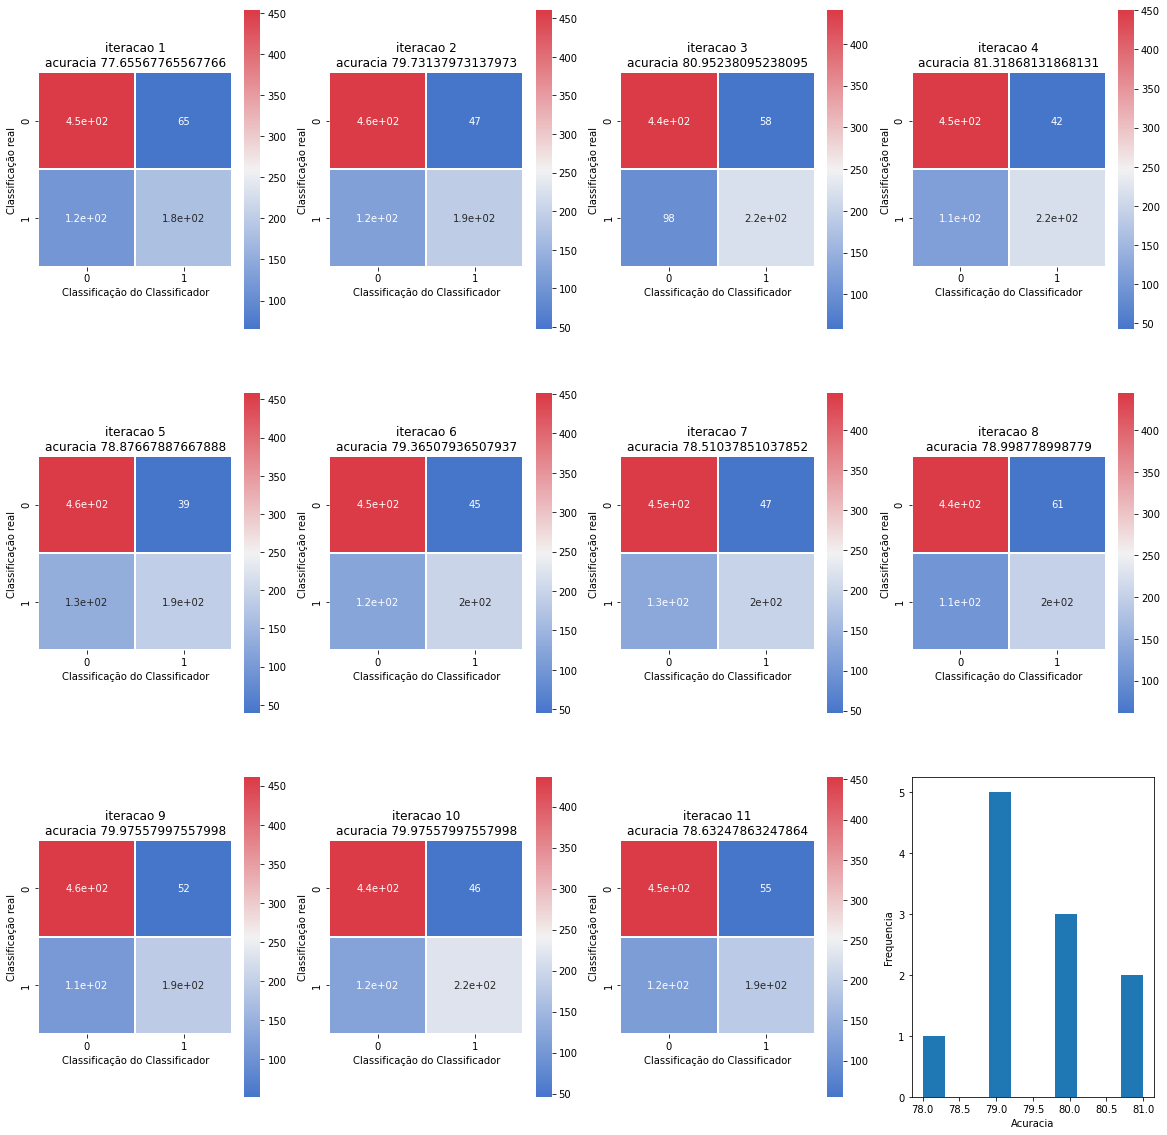

Sout


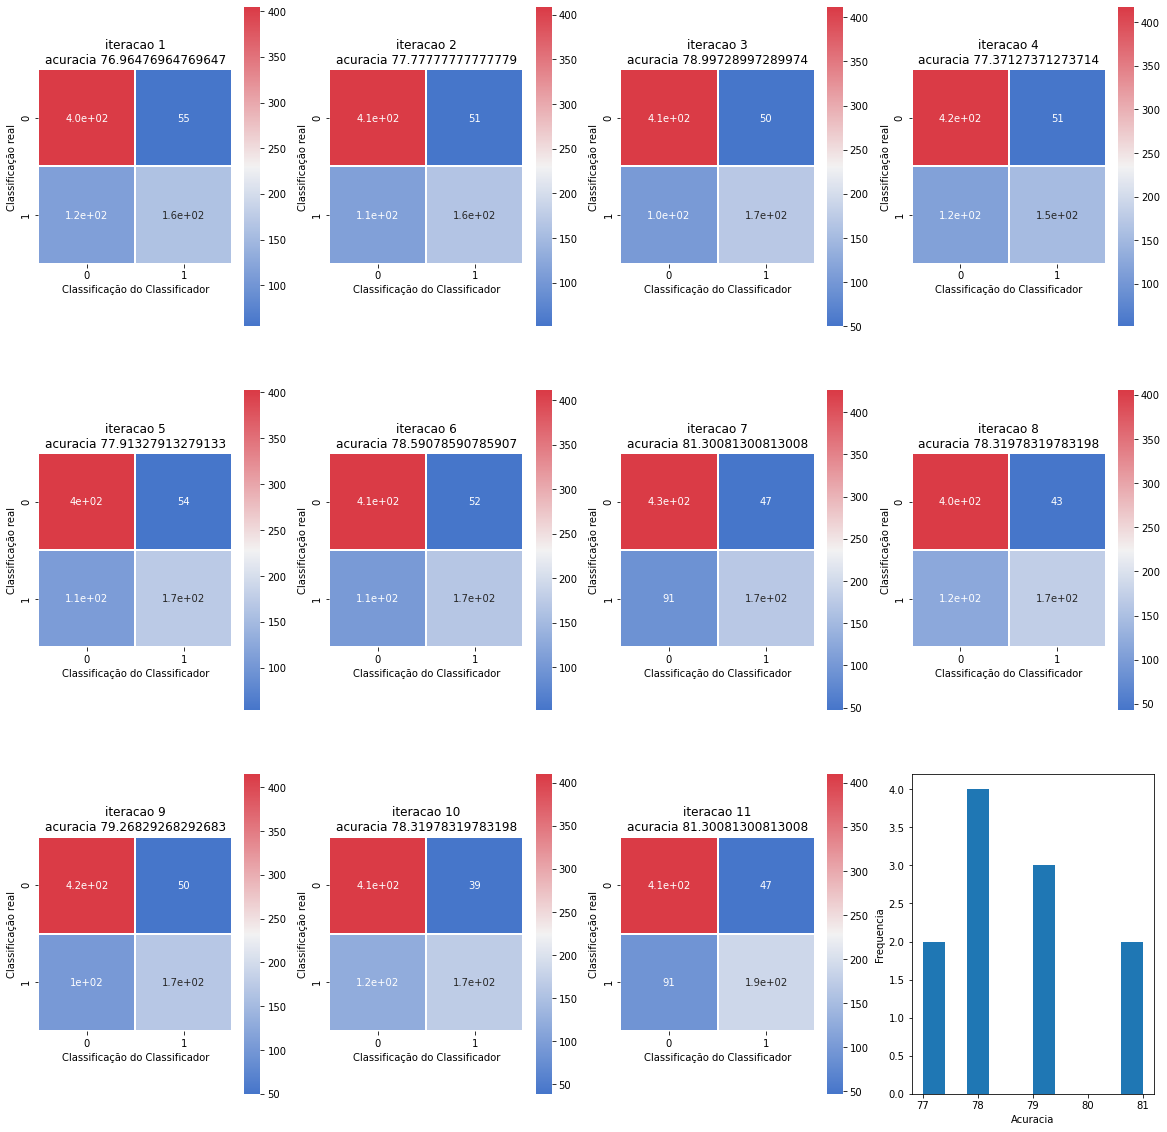

Cout                                                                \
             Vp   Vn  Fp   Fn acuracia_treino acuracia_teste precision_treino   
iteracao1   182  454  65  118           100.0      77.655678            100.0   
iteracao2   192  461  47  119           100.0      79.731380            100.0   
iteracao3   222  441  58   98           100.0      80.952381            100.0   
iteracao4   215  451  42  111           100.0      81.318681            100.0   
iteracao5   188  458  39  134           100.0      78.876679            100.0   
iteracao6   199  451  45  124           100.0      79.365079            100.0   
iteracao7   197  446  47  129           100.0      78.510379            100.0   
iteracao8   203  444  61  111           100.0      78.998779            100.0   
iteracao9   194  461  52  112           100.0      79.975580            100.0   
iteracao10  219  436  46  118           100.0      79.975580            100.0   
iteracao11  191  453  55  120           100.0      78.632479            100.0   

                           Sout                                               \
           precision_teste   Vp   Vn  Fp   Fn acuracia_treino acuracia_teste   
iteracao1        73.684211  163  405  55  115           100.0      76.964770   
iteracao2        80.334728  165  409  51  113           100.0      77.777778   
iteracao3        79.285714  171  412  50  105           100.0      78.997290   
iteracao4        83.657588  153  418  51  116           100.0      77.371274   
iteracao5        82.819383  173  402  54  109           100.0      77.913279   
iteracao6        81.557377  169  411  52  106           100.0      78.590786   
iteracao7        80.737705  174  426  47   91           100.0      81.300813   
iteracao8        76.893939  173  405  43  117           100.0      78.319783   
iteracao9        78.861789  170  415  50  103           100.0      79.268293   
iteracao10       82.641509  168  410  39  121           100.0      78.319783   
iteracao11       77.642276  190  410  47   91           100.0      81.300813   

                                                  Cout-Sout                 \
           precision_treino precision_teste acuracia_treino acuracia_teste   
iteracao1             100.0       74.770642             0.0       0.690908   
iteracao2             100.0       76.388889             0.0       1.953602   
iteracao3             100.0       77.375566             0.0       1.955091   
iteracao4             100.0       75.000000             0.0       3.947408   
iteracao5             100.0       76.211454             0.0       0.963400   
iteracao6             100.0       76.470588             0.0       0.774293   
iteracao7             100.0       78.733032             0.0      -2.790434   
iteracao8             100.0       80.092593             0.0       0.678996   
iteracao9             100.0       77.272727             0.0       0.707287   
iteracao10            100.0       81.159420             0.0       1.655797   
iteracao11            100.0       80.168776             0.0      -2.668334   

                                             
           precision_treino precision_teste  
iteracao1               0.0       -1.086432  
iteracao2               0.0        3.945839  
iteracao3               0.0        1.910149  
iteracao4               0.0        8.657588  
iteracao5               0.0        6.607930  
iteracao6               0.0        5.086789  
iteracao7               0.0        2.004673  
iteracao8               0.0       -3.198653  
iteracao9               0.0        1.589061  
iteracao10              0.0        1.482089  
iteracao11              0.0       -2.526500

In [87]:
metricas(lista_tts, lista_RF)

## XG_BOOST. Expectativas para os resultados gerados
*Explicação leve do XG, lembrando que os primeiros grpaficos são com outliers e os segundos sem.*


Cout


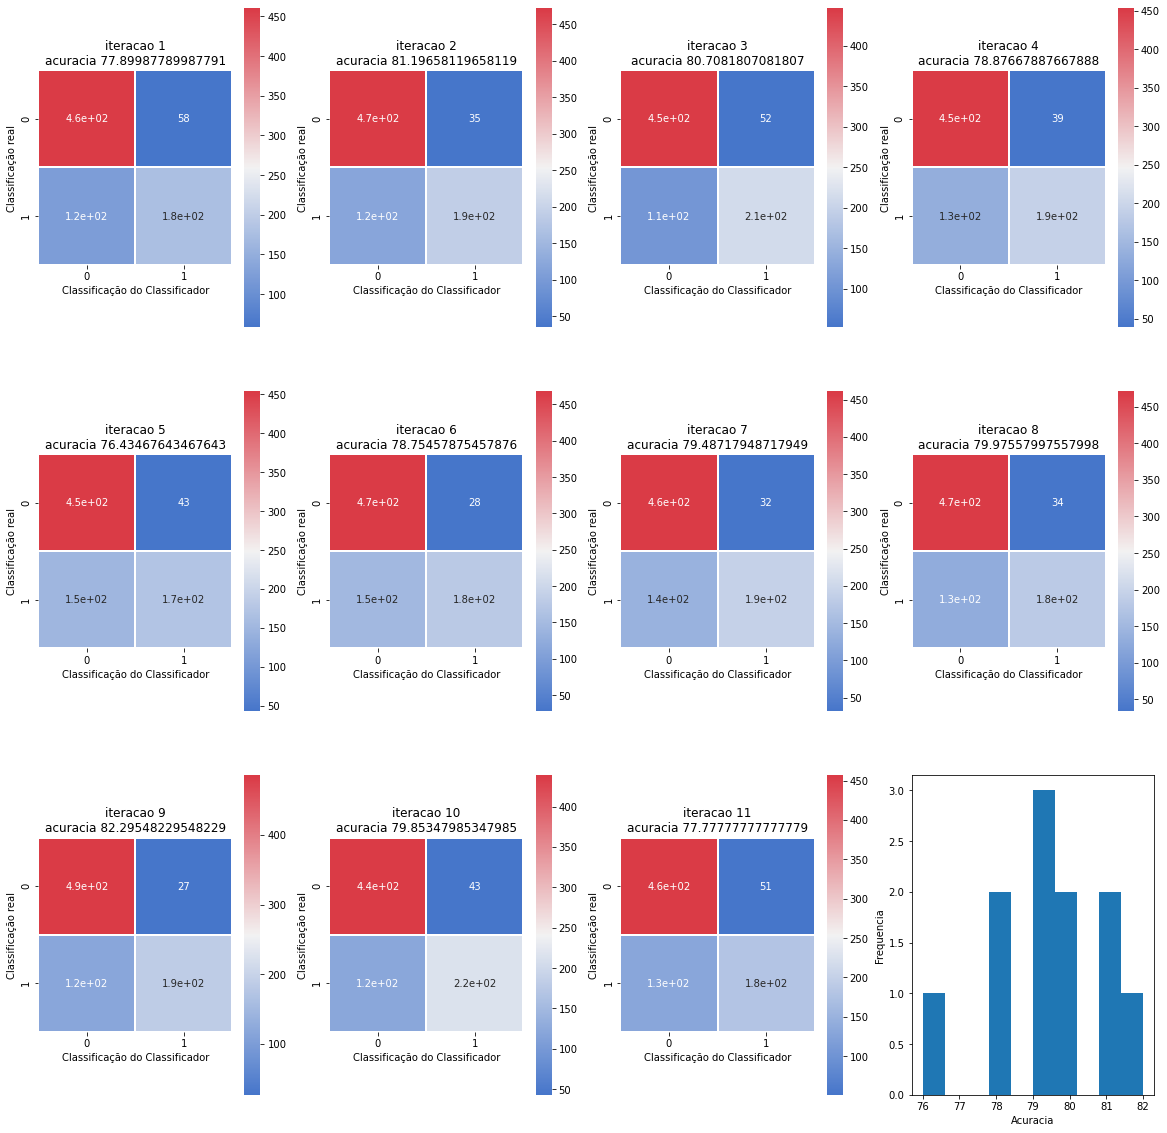

Sout


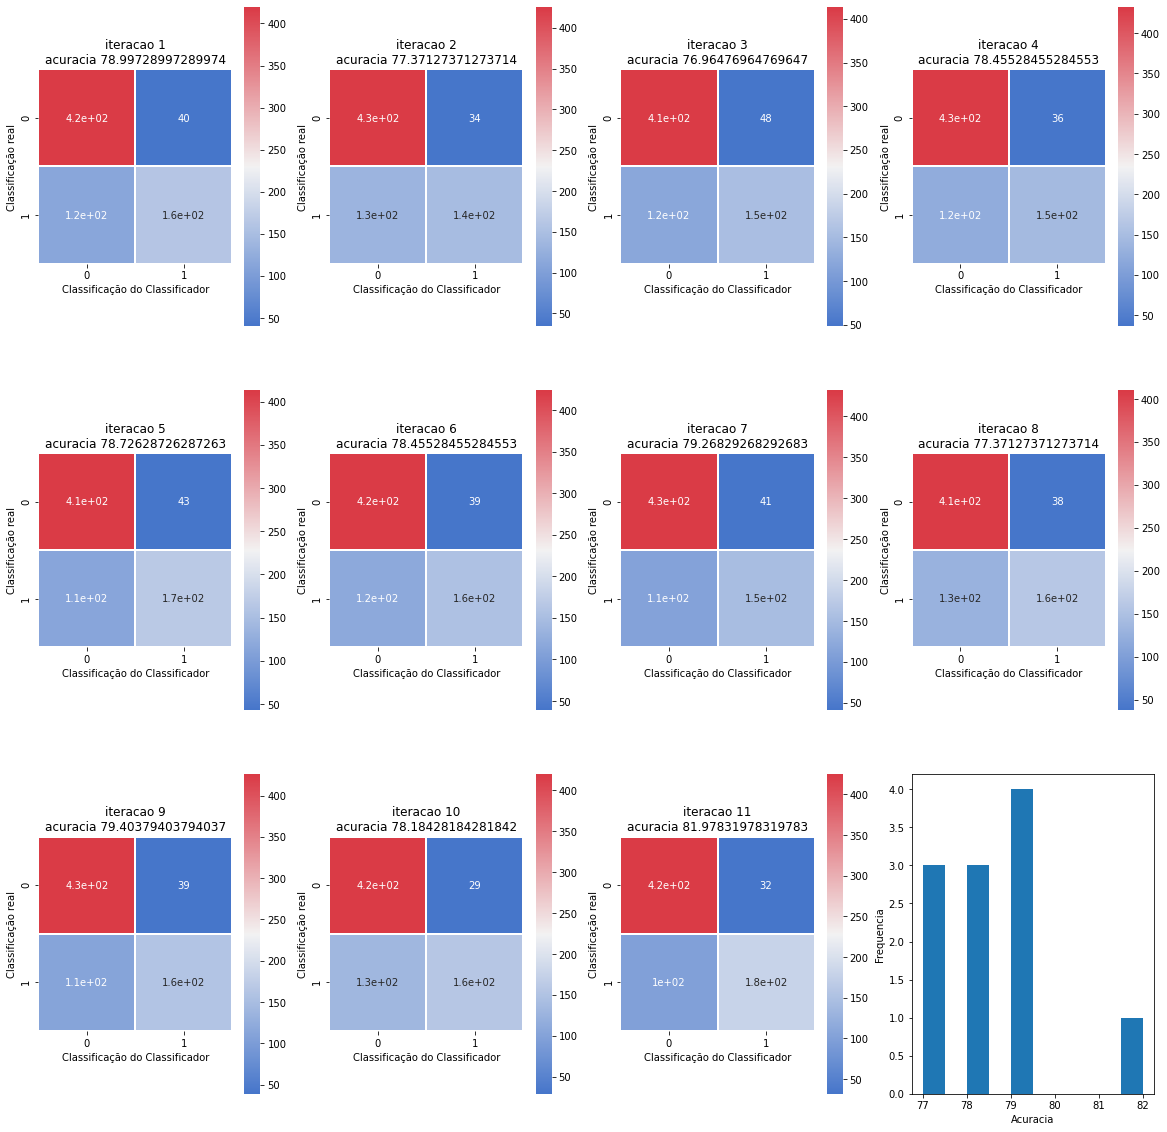

Cout                                                                \
             Vp   Vn  Fp   Fn acuracia_treino acuracia_teste precision_treino   
iteracao1   177  461  58  123       86.243386      77.899878        92.216359   
iteracao2   192  473  35  119       86.691087      81.196581        94.692737   
iteracao3   214  447  52  106       86.161986      80.708181        93.277311   
iteracao4   192  454  39  134       86.080586      78.876679        94.721408   
iteracao5   172  454  43  150       85.877086      76.434676        93.939394   
iteracao6   177  468  28  146       86.324786      78.754579        93.045897   
iteracao7   190  461  32  136       85.958486      79.487179        94.830133   
iteracao8   184  471  34  130       85.185185      79.975580        93.988270   
iteracao9   188  486  27  118       85.551486      82.295482        94.134478   
iteracao10  215  439  43  122       85.958486      79.853480        93.440233   
iteracao11  180  457  51  131       86.161986      77.777778        92.769441   

                           Sout                                               \
           precision_teste   Vp   Vn  Fp   Fn acuracia_treino acuracia_teste   
iteracao1        75.319149  163  420  40  115       86.940804      78.997290   
iteracao2        84.581498  145  426  34  133       87.076367      77.371274   
iteracao3        80.451128  154  414  48  122       85.946679      76.964770   
iteracao4        83.116883  146  433  36  123       86.760054      78.455285   
iteracao5        80.000000  168  413  43  114       86.488929      78.726287   
iteracao6        86.341463  155  424  39  120       85.765929      78.455285   
iteracao7        85.585586  153  432  41  112       85.946679      79.268293   
iteracao8        84.403670  161  410  38  129       87.437867      77.371274   
iteracao9        87.441860  160  426  39  113       87.347492      79.403794   
iteracao10       83.333333  157  420  29  132       86.082241      78.184282   
iteracao11       77.922078  180  425  32  101       86.353366      81.978320   

                                                  Cout-Sout                 \
           precision_treino precision_teste acuracia_treino acuracia_teste   
iteracao1         95.016077       80.295567       -0.697418      -1.097412   
iteracao2         96.528926       81.005587       -0.385280       3.825307   
iteracao3         93.130990       76.237624        0.215307       3.743411   
iteracao4         95.638126       80.219780       -0.679468       0.421394   
iteracao5         94.032258       79.620853       -0.611843      -2.291611   
iteracao6         94.974874       79.896907        0.558858       0.299294   
iteracao7         93.939394       78.865979        0.011807       0.218887   
iteracao8         96.661102       80.904523       -2.252682       2.604306   
iteracao9         95.700637       80.402010       -1.796007       2.891688   
iteracao10        94.612795       84.408602       -0.123755       1.669198   
iteracao11        95.033113       84.905660       -0.191380      -4.200542   

                                             
           precision_treino precision_teste  
iteracao1         -2.799718       -4.976418  
iteracao2         -1.836188        3.575911  
iteracao3          0.146321        4.213504  
iteracao4         -0.916718        2.897103  
iteracao5         -0.092864        0.379147  
iteracao6         -1.928977        6.444556  
iteracao7          0.890739        6.719606  
iteracao8         -2.672832        3.499147  
iteracao9         -1.566159        7.039850  
iteracao10        -1.172561       -1.075269  
iteracao11        -2.263672       -6.983582

In [88]:
metricas(lista_tts, lista_XGB)

## Logistic Regression: Expectativas para os resultados gerados
*Explicação leve do XG, lembrando que os primeiros grpaficos são com outliers e os segundos sem.*

Cout


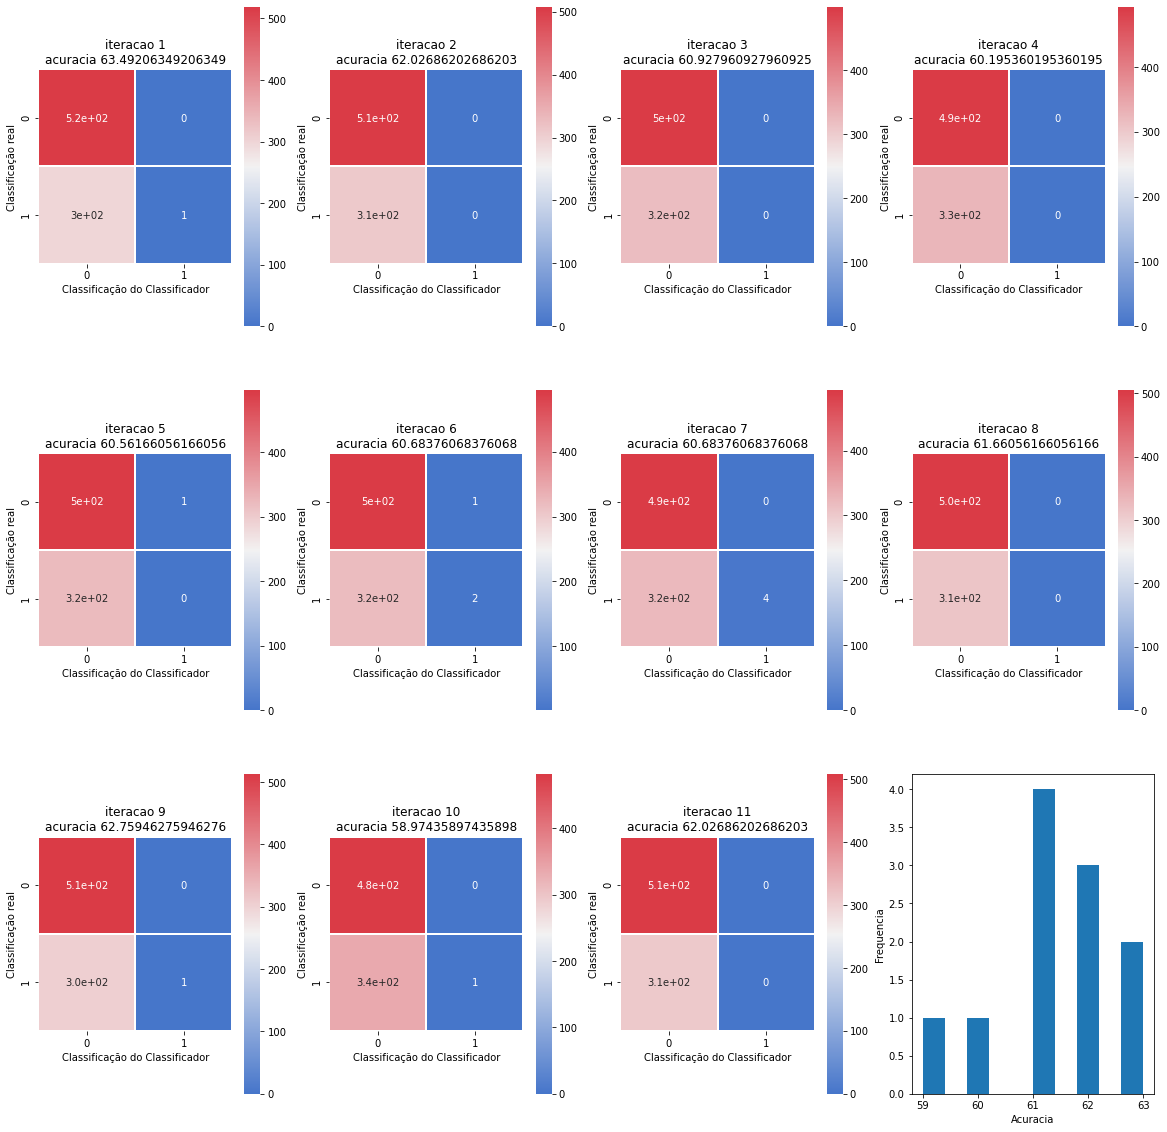

Sout


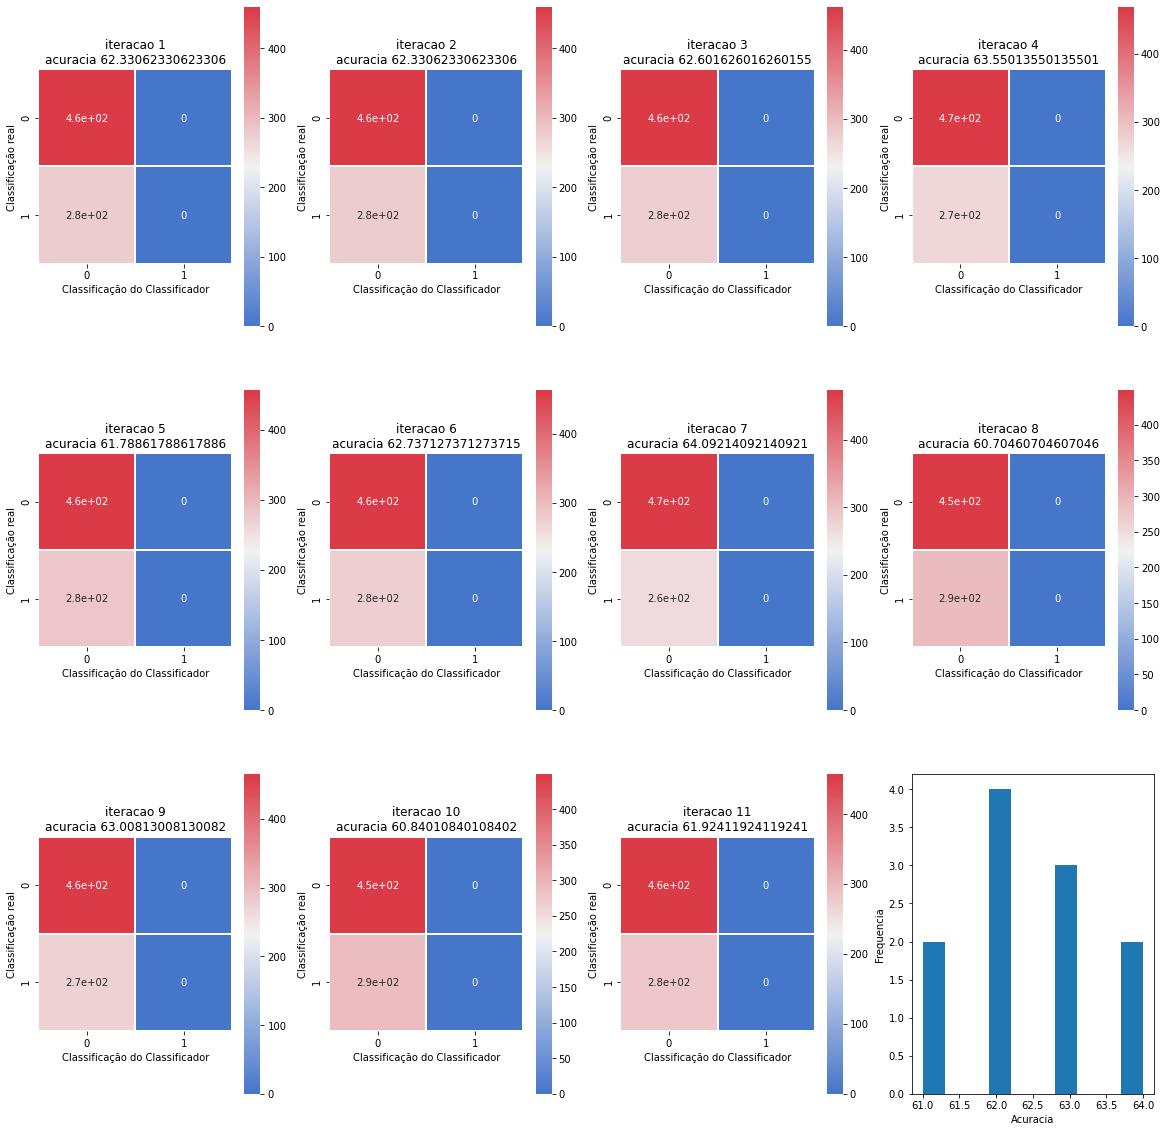

Cout                                                               \
             Vp   Vn Fp   Fn acuracia_treino acuracia_teste precision_treino   
iteracao1     1  519  0  299       60.480260      63.492063        88.888889   
iteracao2     0  508  0  311       60.643061      62.026862        50.000000   
iteracao3     0  499  0  320       61.090761      60.927961       100.000000   
iteracao4     0  493  0  326       61.253561      60.195360         0.000000   
iteracao5     0  496  1  322       61.131461      60.561661       100.000000   
iteracao6     2  495  1  321       61.050061      60.683761        37.500000   
iteracao7     4  493  0  322       61.457061      60.683761       100.000000   
iteracao8     0  505  0  314       60.765161      61.660562         0.000000   
iteracao9     1  513  0  305       60.520961      62.759463       100.000000   
iteracao10    1  482  0  336       61.782662      58.974359        75.000000   
iteracao11    0  508  0  311       60.805861      62.026862        83.333333   

                           Sout                                              \
           precision_teste   Vp   Vn Fp   Fn acuracia_treino acuracia_teste   
iteracao1       100.000000    0  460  0  278       61.635789      62.330623   
iteracao2         0.000000    0  460  0  278       61.680976      62.330623   
iteracao3         0.000000    0  462  0  276       61.545413      62.601626   
iteracao4         0.000000    0  469  0  269       61.229101      63.550136   
iteracao5         0.000000    0  456  0  282       61.952101      61.788618   
iteracao6        66.666667    0  463  0  275       61.500226      62.737127   
iteracao7       100.000000    0  473  0  265       61.048351      64.092141   
iteracao8         0.000000    0  448  0  290       62.178039      60.704607   
iteracao9       100.000000    0  465  0  273       61.409851      63.008130   
iteracao10      100.000000    0  449  0  289       62.132851      60.840108   
iteracao11        0.000000    0  457  0  281       61.771351      61.924119   

                                                  Cout-Sout                 \
           precision_treino precision_teste acuracia_treino acuracia_teste   
iteracao1               0.0             0.0       -1.155528       1.161440   
iteracao2             100.0             0.0       -1.037915      -0.303761   
iteracao3               0.0             0.0       -0.454652      -1.673665   
iteracao4               0.0             0.0        0.024460      -3.354775   
iteracao5             100.0             0.0       -0.820640      -1.226957   
iteracao6               0.0             0.0       -0.450165      -2.053367   
iteracao7               0.0             0.0        0.408711      -3.408380   
iteracao8               0.0             0.0       -1.412878       0.955955   
iteracao9               0.0             0.0       -0.888890      -0.248667   
iteracao10              0.0             0.0       -0.350190      -1.865749   
iteracao11              0.0             0.0       -0.965490       0.102743   

                                             
           precision_treino precision_teste  
iteracao1         88.888889      100.000000  
iteracao2        -50.000000        0.000000  
iteracao3        100.000000        0.000000  
iteracao4          0.000000        0.000000  
iteracao5          0.000000        0.000000  
iteracao6         37.500000       66.666667  
iteracao7        100.000000      100.000000  
iteracao8          0.000000        0.000000  
iteracao9        100.000000      100.000000  
iteracao10        75.000000      100.000000  
iteracao11        83.333333        0.000000

In [89]:
metricas(lista_tts, lista_LR)

## Neural Network (Simulated only once).
*Explicar porque já era esperado que o desempenho da Neural Network não iria ser plausível para o projeto*



### Com Outliers

In [90]:
my_neural_network(ttSout_split[0], ttSout_split[1], ttSout_split[2], ttSout_split[3], loss='binary_crossentropy', metrics=['accuracy'], epochs=50)

Epoch 1/50
2213/2213 [==============================] - 5s 2ms/step - loss: 0.6714 - accuracy: 0.6191
Epoch 2/50
2213/2213 [==============================] - 4s 2ms/step - loss: 0.6460 - accuracy: 0.6408
Epoch 3/50
2213/2213 [==============================] - 4s 2ms/step - loss: 0.6394 - accuracy: 0.6417
Epoch 4/50
2213/2213 [==============================] - 4s 2ms/step - loss: 0.6315 - accuracy: 0.6602
Epoch 5/50
2213/2213 [==============================] - 4s 2ms/step - loss: 0.6339 - accuracy: 0.6643
Epoch 6/50
2213/2213 [==============================] - 4s 2ms/step - loss: 0.6330 - accuracy: 0.6624
Epoch 7/50
2213/2213 [==============================] - 4s 2ms/step - loss: 0.6261 - accuracy: 0.6638
Epoch 8/50
2213/2213 [==============================] - 4s 2ms/step - loss: 0.6255 - accuracy: 0.6728
Epoch 9/50
2213/2213 [==============================] - 4s 2ms/step - loss: 0.6220 - accuracy: 0.6701
Epoch 10/50
2213/2213 [==============================] - 4s 2ms/step - loss: 0.622

{'loss': 0.9363448619842529, 'accuracy': 0.6544715166091919}

### Sem Outliers

In [91]:
my_neural_network(ttSout_split[0], ttSout_split[1], ttSout_split[2], ttSout_split[3], loss='binary_crossentropy', metrics=['accuracy'], epochs=50)

Epoch 1/50
2213/2213 [==============================] - 5s 2ms/step - loss: 0.6681 - accuracy: 0.6118
Epoch 2/50
2213/2213 [==============================] - 4s 2ms/step - loss: 0.6560 - accuracy: 0.6218
Epoch 3/50
2213/2213 [==============================] - 4s 2ms/step - loss: 0.6446 - accuracy: 0.6376
Epoch 4/50
2213/2213 [==============================] - 4s 2ms/step - loss: 0.6364 - accuracy: 0.6426
Epoch 5/50
2213/2213 [==============================] - 4s 2ms/step - loss: 0.6306 - accuracy: 0.6679
Epoch 6/50
2213/2213 [==============================] - 4s 2ms/step - loss: 0.6299 - accuracy: 0.6561
Epoch 7/50
2213/2213 [==============================] - 4s 2ms/step - loss: 0.6272 - accuracy: 0.6719
Epoch 8/50
2213/2213 [==============================] - 4s 2ms/step - loss: 0.6323 - accuracy: 0.6701
Epoch 9/50
2213/2213 [==============================] - 4s 2ms/step - loss: 0.6314 - accuracy: 0.6728
Epoch 10/50
2213/2213 [==============================] - 4s 2ms/step - loss: 0.628

{'loss': 0.9518163204193115, 'accuracy': 0.6273712515830994}

# Considerações finais sobre os modelos e os dados gerados por eles.
*Explicação muito leve sobre NN. Explicar consideração de todos os modelos. Comentar que o NN é muito bom, pra não serve pra nossa base de dados porque é muito pequena, os dados acabariam antes do modelo chegar a uma conclusão confiável, visto que ele funciona muito melhor com grandes base de dados.*

# Evitando falsos positivos: a importância da definição correta
Nesse projeto, é necessário evitar falsos positivos, visto que, ao considerar uma água potável e segura para consumo quando isso não é verdade, ou seja, quando acontece um falso positivo, torna-se perigoso para a pessoa que for ingerir esta água. Assim, a chance de uma pessoa ingerir uma água teoricamente segura, quando perigosa, diminui. Como consequência, mais águas seguras serão descartadas, em virtude da segurança das pessoas que irão consumir a água.

# Random Forest

In [92]:
def RF_Clf_Fn(Train_X, Test_X, Train_Y, Test_Y):
    RF_clf = RandomForestC()
    RF_clf.fit(Train_X, Train_Y)
    RF_train_predicted_proba = RF_clf.predict_proba(Train_X)
    RF_train_pred = (RF_train_predicted_proba [:,1] >= 0.8).astype('int')
    RF_test_predicted_proba = RF_clf.predict_proba(Test_X)
    RF_test_pred = (RF_test_predicted_proba [:,1] >= 0.8).astype('int')
    RF_train_score = accuracy_score(Train_Y, RF_train_pred)*100
    RF_train_Precisionscore = precision_score(Train_Y, RF_train_pred)*100
    RF_test_score = accuracy_score(Test_Y, RF_test_pred)*100
    RF_test_Precisionscore = precision_score(Test_Y, RF_test_pred)*100
    return [[RF_train_score, RF_test_score, RF_test_pred], [RF_train_Precisionscore, RF_test_Precisionscore]]

# XG_BOOST

In [93]:
def XGB_Clf_Fn(Train_X, Test_X, Train_Y, Test_Y):
    XGB_clf = RandomForestC()
    XGB_clf.fit(Train_X, Train_Y)
    XGB_train_predicted_proba = XGB_clf.predict_proba(Train_X)
    XGB_train_pred = (XGB_train_predicted_proba [:,1] >= 0.8).astype('int')
    XGB_test_predicted_proba = XGB_clf.predict_proba(Test_X)
    XGB_test_pred = (XGB_test_predicted_proba [:,1] >= 0.8).astype('int')
    XGB_train_score = accuracy_score(Train_Y, XGB_train_pred)*100
    XGB_train_Precisionscore = precision_score(Train_Y, XGB_train_pred)*100
    XGB_test_score = accuracy_score(Test_Y, XGB_test_pred)*100
    XGB_test_Precisionscore = precision_score(Test_Y, XGB_test_pred)*100
    return [[XGB_train_score, XGB_test_score, XGB_test_pred], [XGB_train_Precisionscore, XGB_test_Precisionscore]]

# Rodando os classificadores

In [99]:
listaCout_tts_Fn = []; listaSout_tts_Fn = []; lista_tts_Fn = [[], []]; lista_RF_Fn = [[], []]; lista_XGB_Fn = [[], []]
for i in range(11):
    ttCout_split = tts(df_agua1.drop(['Potability'], axis=1), df_agua1.Potability, test_size=0.25)
    ttSout_split = tts(df_agua1_Sout.drop(['Potability'], axis=1), df_agua1_Sout.Potability, test_size=0.25)
    lista_tts_Fn[0].append(ttCout_split)
    lista_tts_Fn[1].append(ttSout_split)
    lista_RF_Fn[0].append(RF_Clf_Fn(ttCout_split[0], ttCout_split[1], ttCout_split[2], ttCout_split[3]))
    lista_RF_Fn[1].append(RF_Clf_Fn(ttSout_split[0], ttSout_split[1], ttSout_split[2], ttSout_split[3]))
    lista_XGB_Fn[0].append(XGB_Clf_Fn(ttCout_split[0], ttCout_split[1], ttCout_split[2], ttCout_split[3]))
    lista_XGB_Fn[1].append(XGB_Clf_Fn(ttSout_split[0], ttSout_split[1], ttSout_split[2], ttSout_split[3]))

# Random Forets
*Explicação de porque é melhot haver acurácia mais baixa com precisão (% verdadeiros) maior*

Cout


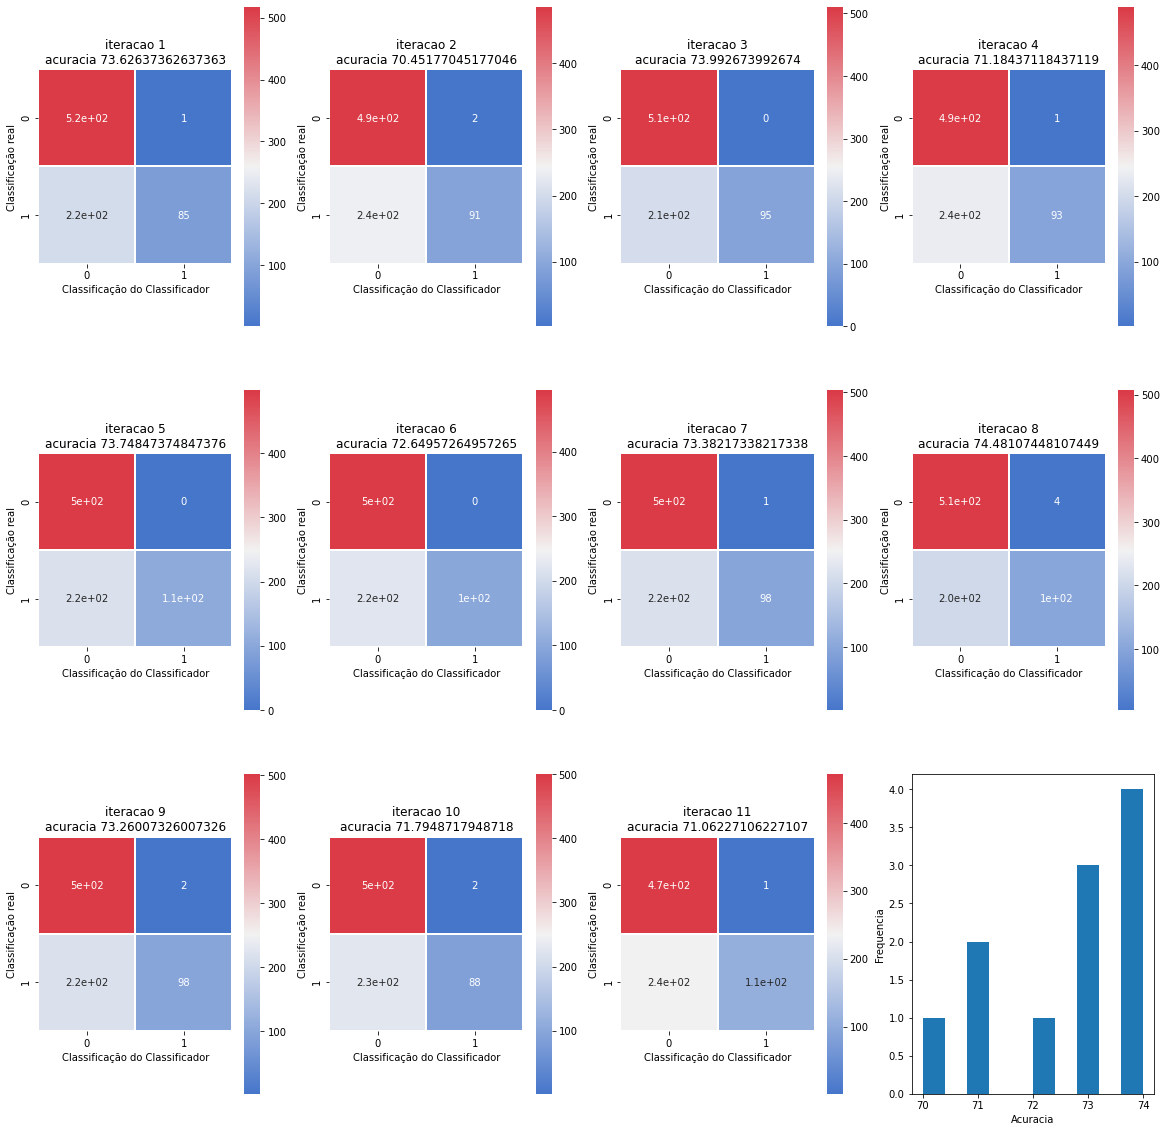

Sout


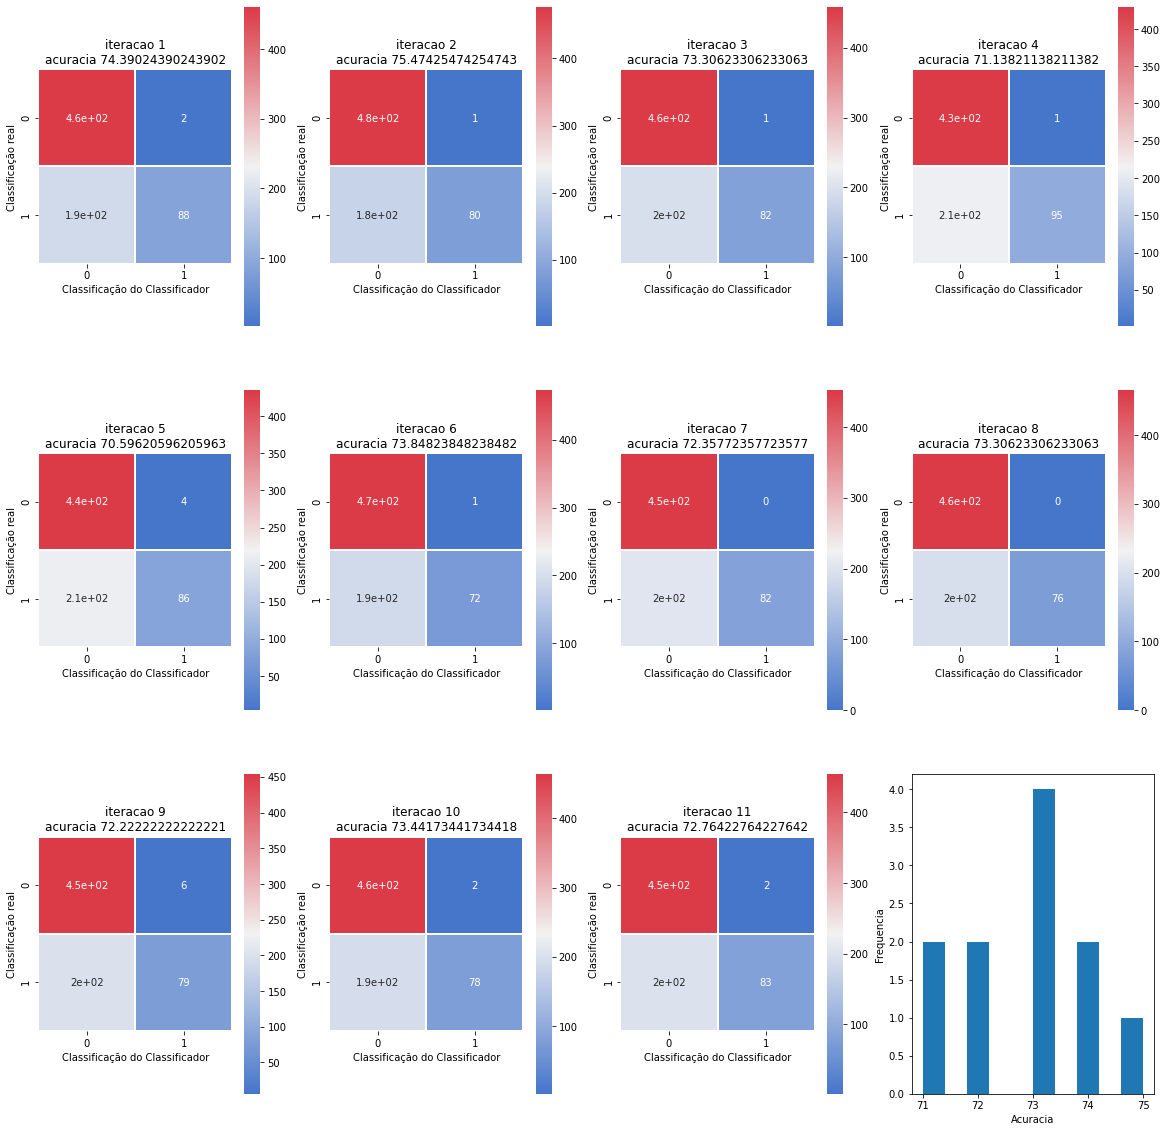

Cout                                                               \
             Vp   Vn Fp   Fn acuracia_treino acuracia_teste precision_treino   
iteracao1    85  518  1  215       89.092389      73.626374            100.0   
iteracao2    91  486  2  240       88.929589      70.451770            100.0   
iteracao3    95  511  0  213       88.522589      73.992674            100.0   
iteracao4    93  490  1  235       89.214489      71.184371            100.0   
iteracao5   106  498  0  215       89.377289      73.748474            100.0   
iteracao6   100  495  0  224       88.400488      72.649573            100.0   
iteracao7    98  503  1  217       88.481888      73.382173            100.0   
iteracao8   103  507  4  205       88.807489      74.481074            100.0   
iteracao9    98  502  2  217       89.295889      73.260073            100.0   
iteracao10   88  500  2  229       89.580790      71.794872            100.0   
iteracao11  110  472  1  236       88.481888      71.062271            100.0   

                           Sout                                              \
           precision_teste   Vp   Vn Fp   Fn acuracia_treino acuracia_teste   
iteracao1        98.837209   88  461  2  187       88.386805      74.390244   
iteracao2        97.849462   80  477  1  180       88.657930      75.474255   
iteracao3       100.000000   82  459  1  196       88.206055      73.306233   
iteracao4        98.936170   95  430  1  212       88.251243      71.138211   
iteracao5       100.000000   86  435  4  213       86.940804      70.596206   
iteracao6       100.000000   72  473  1  192       88.657930      73.848238   
iteracao7        98.989899   82  452  0  204       88.296430      72.357724   
iteracao8        96.261682   76  465  0  197       88.206055      73.306233   
iteracao9        98.000000   79  454  6  199       88.612743      72.222222   
iteracao10       97.777778   78  464  2  194       88.838681      73.441734   
iteracao11       99.099099   83  454  2  199       88.431993      72.764228   

                                                  Cout-Sout                 \
           precision_treino precision_teste acuracia_treino acuracia_teste   
iteracao1             100.0       97.777778        0.705584      -0.763870   
iteracao2             100.0       98.765432        0.271659      -5.022484   
iteracao3             100.0       98.795181        0.316533       0.686441   
iteracao4             100.0       98.958333        0.963247       0.046160   
iteracao5             100.0       95.555556        2.436485       3.152268   
iteracao6             100.0       98.630137       -0.257442      -1.198666   
iteracao7             100.0      100.000000        0.185458       1.024450   
iteracao8             100.0      100.000000        0.601434       1.174841   
iteracao9             100.0       92.941176        0.683146       1.037851   
iteracao10            100.0       97.500000        0.742109      -1.646863   
iteracao11            100.0       97.647059        0.049896      -1.701957   

                                             
           precision_treino precision_teste  
iteracao1               0.0        1.059432  
iteracao2               0.0       -0.915970  
iteracao3               0.0        1.204819  
iteracao4               0.0       -0.022163  
iteracao5               0.0        4.444444  
iteracao6               0.0        1.369863  
iteracao7               0.0       -1.010101  
iteracao8               0.0       -3.738318  
iteracao9               0.0        5.058824  
iteracao10              0.0        0.277778  
iteracao11              0.0        1.452040

In [100]:
metricas(lista_tts_Fn, lista_RF_Fn)

# XG_BOOST
*Mesma explicação que acima*

Cout


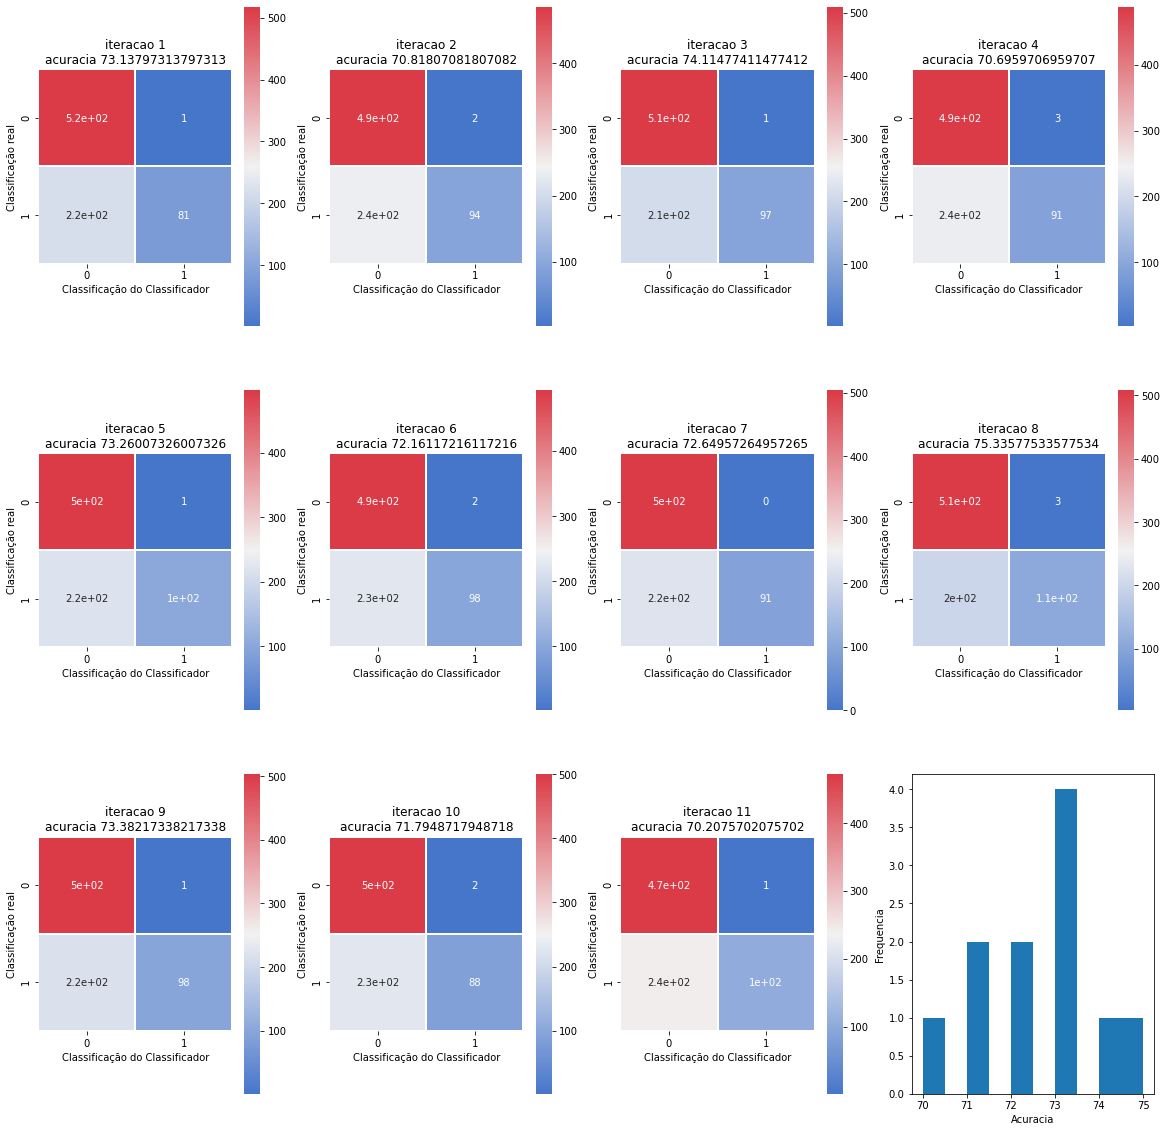

Sout


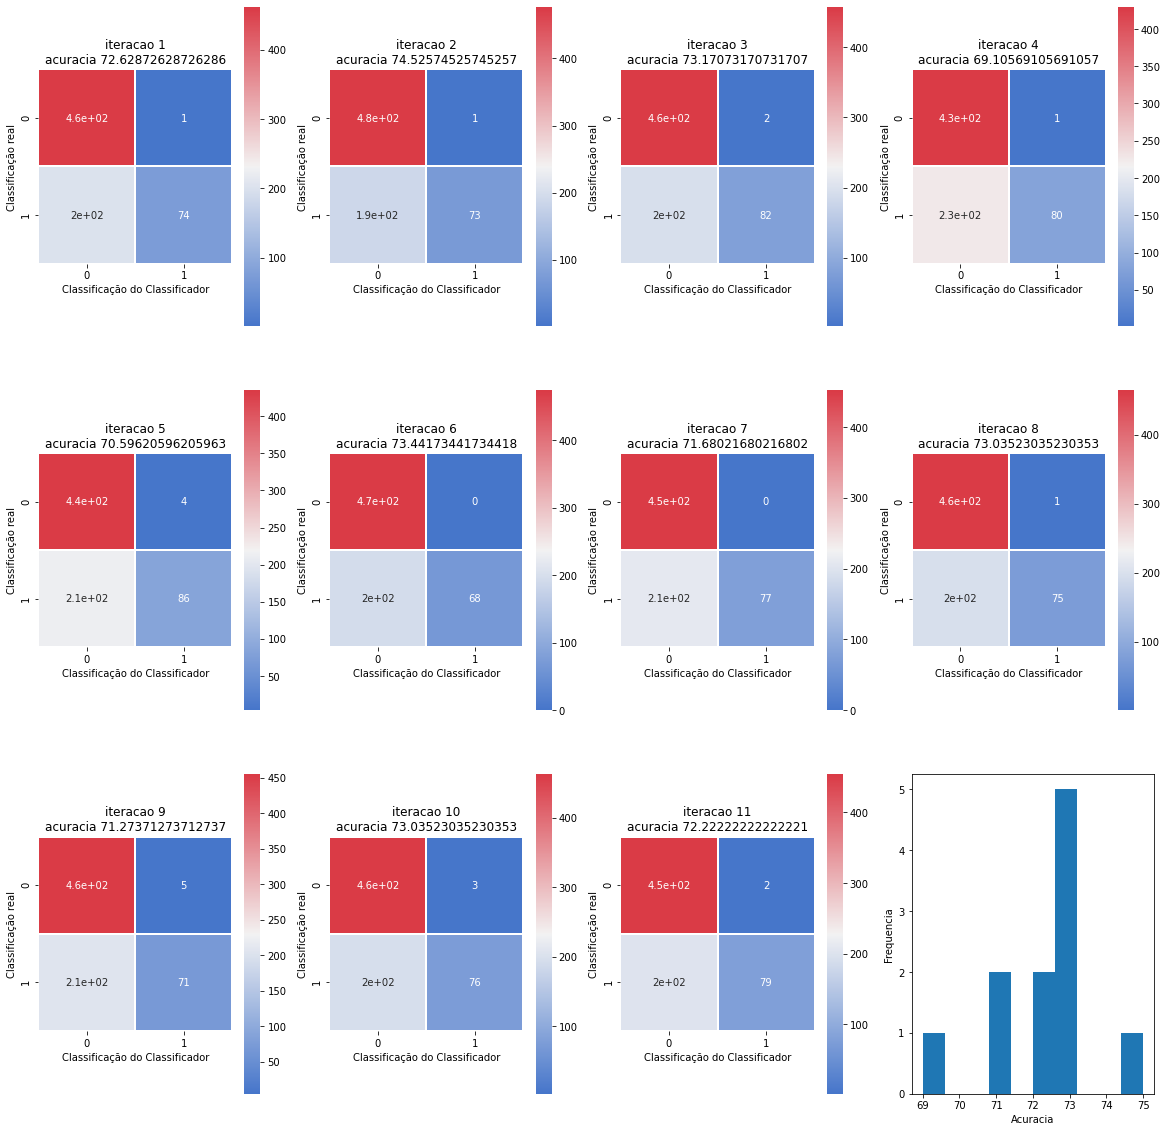

Cout                                                               \
             Vp   Vn Fp   Fn acuracia_treino acuracia_teste precision_treino   
iteracao1    81  518  1  219       88.726089      73.137973            100.0   
iteracao2    94  486  2  237       88.970289      70.818071            100.0   
iteracao3    97  510  1  211       88.481888      74.114774            100.0   
iteracao4    91  488  3  237       89.417989      70.695971            100.0   
iteracao5   103  497  1  218       89.092389      73.260073            100.0   
iteracao6    98  493  2  226       88.481888      72.161172            100.0   
iteracao7    91  504  0  224       88.888889      72.649573            100.0   
iteracao8   109  508  3  199       89.051689      75.335775            100.0   
iteracao9    98  503  1  217       89.092389      73.382173            100.0   
iteracao10   88  500  2  229       89.540090      71.794872            100.0   
iteracao11  103  472  1  243       88.074888      70.207570            100.0   

                           Sout                                              \
           precision_teste   Vp   Vn Fp   Fn acuracia_treino acuracia_teste   
iteracao1        98.780488   74  462  1  201       87.844555      72.628726   
iteracao2        97.916667   73  477  1  187       89.064618      74.525745   
iteracao3        98.979592   82  458  2  196       89.471306      73.170732   
iteracao4        96.808511   80  430  1  227       88.612743      69.105691   
iteracao5        99.038462   86  435  4  213       88.160868      70.596206   
iteracao6        98.000000   68  474  0  196       88.838681      73.441734   
iteracao7       100.000000   77  452  0  209       88.070493      71.680217   
iteracao8        97.321429   75  464  1  198       88.567555      73.035230   
iteracao9        98.989899   71  455  5  207       88.567555      71.273713   
iteracao10       97.777778   76  463  3  196       87.934930      73.035230   
iteracao11       99.038462   79  454  2  203       88.793493      72.222222   

                                                  Cout-Sout                 \
           precision_treino precision_teste acuracia_treino acuracia_teste   
iteracao1             100.0       98.666667        0.881534       0.509247   
iteracao2             100.0       98.648649       -0.094329      -3.707674   
iteracao3             100.0       97.619048       -0.989417       0.944042   
iteracao4             100.0       98.765432        0.805247       1.590280   
iteracao5             100.0       95.555556        0.931521       2.663867   
iteracao6             100.0      100.000000       -0.356792      -1.280562   
iteracao7             100.0      100.000000        0.818396       0.969356   
iteracao8             100.0       98.684211        0.484134       2.300545   
iteracao9             100.0       93.421053        0.524834       2.108461   
iteracao10            100.0       96.202532        1.605160      -1.240359   
iteracao11            100.0       97.530864       -0.718605      -2.014652   

                                             
           precision_treino precision_teste  
iteracao1               0.0        0.113821  
iteracao2               0.0       -0.731982  
iteracao3               0.0        1.360544  
iteracao4               0.0       -1.956921  
iteracao5               0.0        3.482906  
iteracao6               0.0       -2.000000  
iteracao7               0.0        0.000000  
iteracao8               0.0       -1.362782  
iteracao9               0.0        5.568846  
iteracao10              0.0        1.575246  
iteracao11              0.0        1.507597

In [101]:
metricas(lista_tts_Fn, lista_XGB_Fn)

# Considerações finais do projeto. 
*Os resultados obtidos são satisfatórios? Qual o melhor modelo? E por que? Também, comentar um pouco sobre cada modelo e porque foi usado o Random Forest/ GX Boost, com/sem outliers (lembrando que precisão > acurácia). Falar que apenas esse modelos foram modelados de forma tendenciosa, porque não havia razão para usar esse recurso nas outras opções.*

## Fontes

https://www.datageeks.com.br/xgboost/

https://medium.com/cinthiabpessanha/random-forest-como-funciona-um-dos-algoritmos-mais-populares-de-ml-cc1b8a58b3b4

https://medium.com/@msremigio/regress%C3%A3o-log%C3%ADstica-logistic-regression-997c6259ff9a

https://www.organicadigital.com/blog/algoritmo-de-classificacao-naive-bayes/

https://www.datageeks.com.br/naive-bayes/

https://minerandodados.com.br/tratando-outliers-python/

https://sigmoidal.ai/como-implementar-regressao-linear-com-python/